In [1]:
library(data.table)

In [2]:
library(plyr)

In [3]:
library(ggplot2)

In [4]:
revisions_weighted_sums_and_page_views_2013_2014 <- read.table("../../../results/misalignment_edit_types_tables_and_queries/all_revisions_quality_differences_2013_2014.tsv", header=FALSE, sep="\t")

In [5]:
revisions_weighted_sums_and_page_views_2014_2015 <- read.table("../../../results/misalignment_edit_types_tables_and_queries/all_revisions_quality_differences_2014_2015.tsv", header=FALSE, sep="\t")

In [6]:
revisions_weighted_sums_and_page_views_2015_2016 <- read.table("../../../results/misalignment_edit_types_tables_and_queries/all_revisions_quality_differences_2015_2016.tsv", header=FALSE, sep="\t")

In [7]:
revisions_weighted_sums_and_page_views_2016_2017 <- read.table("../../../results/misalignment_edit_types_tables_and_queries/all_revisions_quality_differences_2016_2017.tsv", header=FALSE, sep="\t")

In [8]:
colnames(revisions_weighted_sums_and_page_views_2013_2014) <- c("page_title", "namespace", "edit_type", "agent_type", "rev_id", "weighted_sum","expected_quality","expected_quality_quantile","page_views","yyyy","mm", "quality_difference")
colnames(revisions_weighted_sums_and_page_views_2014_2015) <- c("page_title", "namespace", "edit_type", "agent_type", "rev_id", "weighted_sum","expected_quality","expected_quality_quantile","page_views","yyyy","mm", "quality_difference")
colnames(revisions_weighted_sums_and_page_views_2015_2016) <- c("page_title", "namespace", "edit_type", "agent_type", "rev_id", "weighted_sum","expected_quality","expected_quality_quantile","page_views","yyyy","mm", "quality_difference")
colnames(revisions_weighted_sums_and_page_views_2016_2017) <- c("page_title", "namespace", "edit_type", "agent_type", "rev_id", "weighted_sum","expected_quality","expected_quality_quantile","page_views","yyyy","mm", "quality_difference")

In [9]:
revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == "human_bot_like_edit",]$agent_type = "human_edit"
revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == "human_bot_like_edit",]$agent_type = "human_edit"
revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == "human_bot_like_edit",]$agent_type = "human_edit"
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == "human_bot_like_edit",]$agent_type = "human_edit"

revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == "anon_bot_like_edit",]$agent_type = "anon_edit"
revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == "anon_bot_like_edit",]$agent_type = "anon_edit"
revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == "anon_bot_like_edit",]$agent_type = "anon_edit"
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == "anon_bot_like_edit",]$agent_type = "anon_edit"

In [10]:
summary(revisions_weighted_sums_and_page_views_2013_2014)
summary(revisions_weighted_sums_and_page_views_2014_2015)
summary(revisions_weighted_sums_and_page_views_2015_2016)
summary(revisions_weighted_sums_and_page_views_2016_2017)


    page_title       namespace       edit_type     
 Q4115189:    53   Min.   :0   claim      :395867  
 Q273461 :    15   1st Qu.:0   reference  :236000  
 Q183    :    14   Median :0   NULL       :196743  
 Q511968 :    14   Mean   :0   label      : 74826  
 Q40030  :    13   3rd Qu.:0   description: 58998  
 Q6714402:    11   Max.   :0   sitelink   : 31104  
 (Other) :997874               (Other)    :  4456  
               agent_type         rev_id           weighted_sum  
 anon_bot_like_edit :     0   Min.   : 33066196   Min.   :1.003  
 anon_edit          :  5013   1st Qu.: 56036418   1st Qu.:1.083  
 bot_edit           :891813   Median : 78474947   Median :1.203  
 human_bot_like_edit:     0   Mean   : 78624344   Mean   :1.534  
 human_edit         : 89634   3rd Qu.:101361152   3rd Qu.:1.943  
 semi_automated_edit: 11534   Max.   :124126530   Max.   :4.759  
                                                                 
 expected_quality expected_quality_quantile   page_views

     page_title       namespace       edit_type     
 Q4115189 :    41   Min.   :0   claim      :374644  
 Q16943273:    38   1st Qu.:0   NULL       :274056  
 Q12652   :    25   Median :0   reference  :112289  
 Q979470  :    25   Mean   :0   label      :101986  
 Q1270623 :    24   3rd Qu.:0   description: 92537  
 Q16987   :    22   Max.   :0   sitelink   : 32153  
 (Other)  :996977               (Other)    :  9487  
               agent_type         rev_id           weighted_sum  
 anon_bot_like_edit :     0   Min.   :124126897   Min.   :1.003  
 anon_edit          :  5530   1st Qu.:145021936   1st Qu.:1.124  
 bot_edit           :727118   Median :167464158   Median :1.481  
 human_bot_like_edit:     0   Mean   :167698933   Mean   :1.762  
 human_edit         : 92859   3rd Qu.:189330762   3rd Qu.:2.220  
 semi_automated_edit:171645   Max.   :213661247   Max.   :4.906  
                                                                 
 expected_quality expected_quality_quantile   pa

     page_title       namespace       edit_type     
 Q21521425:    81   Min.   :0   claim      :276012  
 Q21481859:    56   1st Qu.:0   description:216079  
 Q22676705:    46   Median :0   NULL       :199075  
 Q16943273:    33   Mean   :0   reference  :151022  
 Q4115189 :    30   3rd Qu.:0   label      : 96141  
 Q21521431:    17   Max.   :0   sitelink   : 32135  
 (Other)  :996394               (Other)    : 26193  
               agent_type         rev_id           weighted_sum  
 anon_bot_like_edit :     0   Min.   :213661559   Min.   :1.003  
 anon_edit          :  5309   1st Qu.:241149828   1st Qu.:1.175  
 bot_edit           :683802   Median :269471185   Median :1.979  
 human_bot_like_edit:     0   Mean   :269991562   Mean   :2.023  
 human_edit         : 94080   3rd Qu.:298420803   3rd Qu.:2.950  
 semi_automated_edit:213466   Max.   :328006161   Max.   :4.997  
                                                                 
 expected_quality expected_quality_quantile   pa

     page_title       namespace       edit_type     
 Q4115189 :    73   Min.   :0   claim      :286240  
 Q16943273:    35   1st Qu.:0   NULL       :242281  
 Q2289941 :    29   Median :0   description:163252  
 Q670933  :    28   Mean   :0   reference  :121650  
 Q707063  :    28   3rd Qu.:0   label      :106991  
 Q28564101:    27   Max.   :0   qualifier  : 37749  
 (Other)  :994805               (Other)    : 36862  
               agent_type         rev_id           weighted_sum  
 anon_bot_like_edit :     0   Min.   :328006265   Min.   :1.003  
 anon_edit          :  4701   1st Qu.:359396791   1st Qu.:1.197  
 bot_edit           :552724   Median :395764165   Median :2.004  
 human_bot_like_edit:     0   Mean   :401565716   Mean   :2.115  
 human_edit         :123030   3rd Qu.:447003701   3rd Qu.:2.972  
 semi_automated_edit:314570   Max.   :480380485   Max.   :4.997  
                                                                 
 expected_quality expected_quality_quantile   pa

In [11]:
revisions_weighted_sums_and_page_views_2013_2014$group = "2013-2014"
revisions_weighted_sums_and_page_views_2014_2015$group = "2014-2015"
revisions_weighted_sums_and_page_views_2015_2016$group = "2015-2016"
revisions_weighted_sums_and_page_views_2016_2017$group = "2016-2017"

In [12]:
revisions_weighted_sums_and_page_views = 
    rbind(rbind(rbind(revisions_weighted_sums_and_page_views_2013_2014,
                      revisions_weighted_sums_and_page_views_2014_2015),
                      revisions_weighted_sums_and_page_views_2015_2016),
                      revisions_weighted_sums_and_page_views_2016_2017)

In [13]:
revisions_weighted_sums_and_page_views$group = factor(revisions_weighted_sums_and_page_views$group)

In [14]:
nrow(revisions_weighted_sums_and_page_views)

[1] 3986828

In [15]:
summary(revisions_weighted_sums_and_page_views_2013_2014$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017$quality_difference)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.899000  0.003195  0.378000  0.488400  1.102000  3.372000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0610 -0.0599  0.2934  0.4741  1.1080  3.3890 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0400 -0.0981  0.3037  0.5208  1.1750  3.6760 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.5220 -0.2436  0.0949  0.1881  0.7727  3.6800 

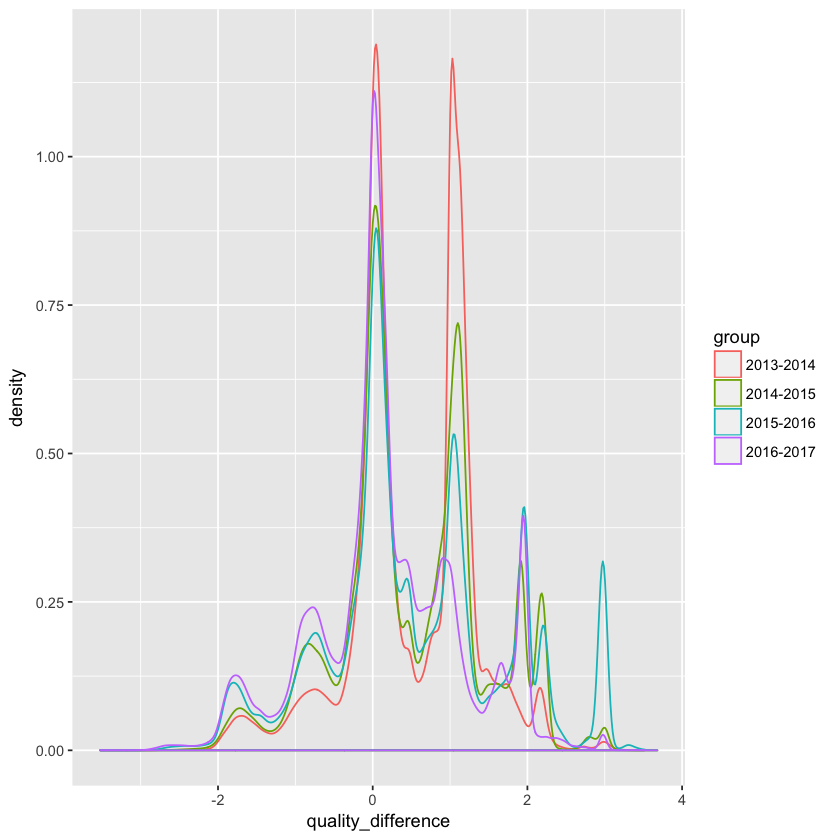

In [16]:
ggplot(revisions_weighted_sums_and_page_views, 
       aes(x=quality_difference, color=group)) + geom_density()

In [17]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'aliases',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'aliases',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'aliases',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'aliases',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.73500 -0.81050 -0.07144 -0.20640  0.20990  2.76400 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.87000 -0.78510 -0.06914 -0.16400  0.32470  2.97300 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8030 -0.8776 -0.1901 -0.2372  0.2805  2.9960 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.94900 -0.77010 -0.01609 -0.10310  0.44980  2.78800 

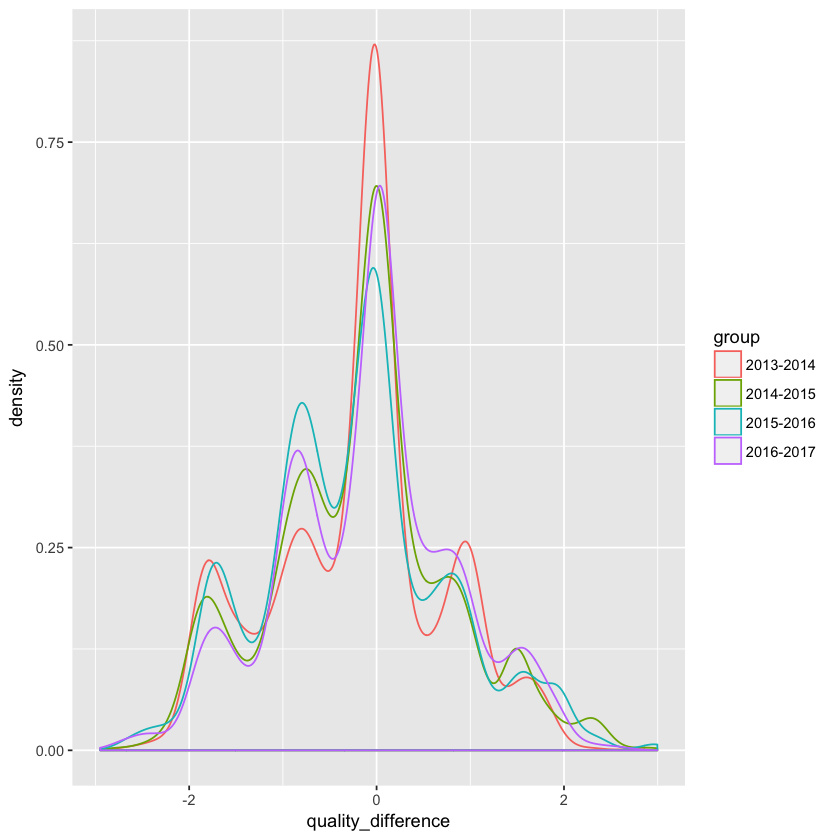

In [18]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [19]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'claim',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'claim',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'claim',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim',]$quality_difference)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.899000 -0.004561  0.250800  0.468700  1.102000  3.372000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0610 -0.1176  0.1207  0.3372  1.0490  3.3770 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.02000 -0.32330  0.07886  0.22110  1.01900  3.47100 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.31400 -0.58310  0.01250 -0.00722  0.59320  3.33200 

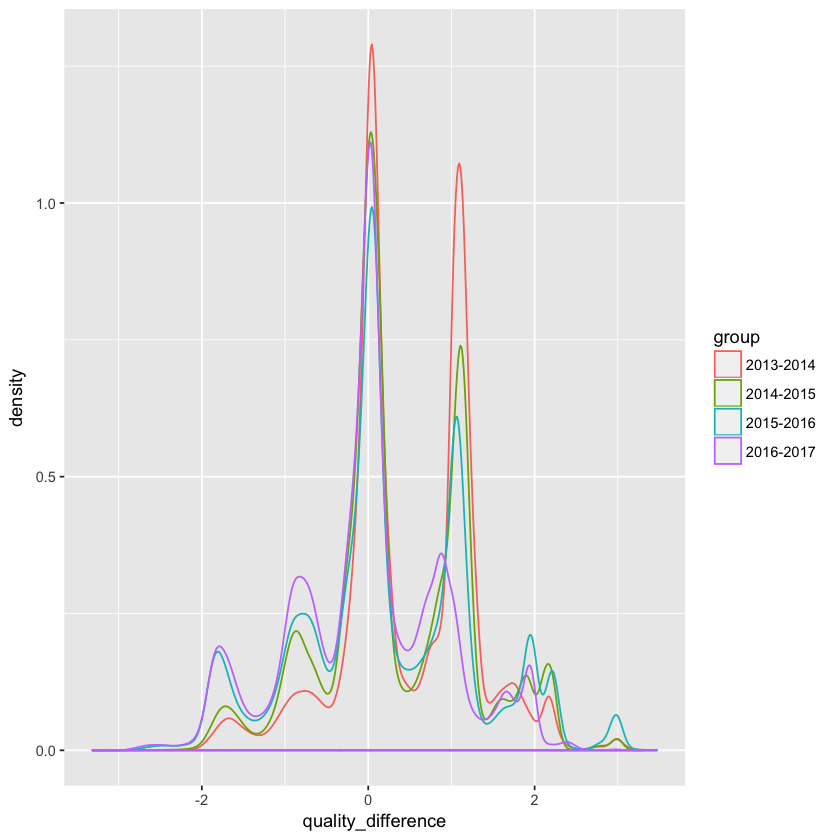

In [20]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [21]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'description',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'description',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'description',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'description',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.5420  0.1198  0.8255  0.7286  1.1520  3.2120 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.58200  0.07229  0.49930  0.63410  1.12400  3.27700 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8200  0.1201  0.6484  0.9250  1.9060  3.5410 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.28300 -0.05111  0.21570  0.45650  1.06200  3.12600 

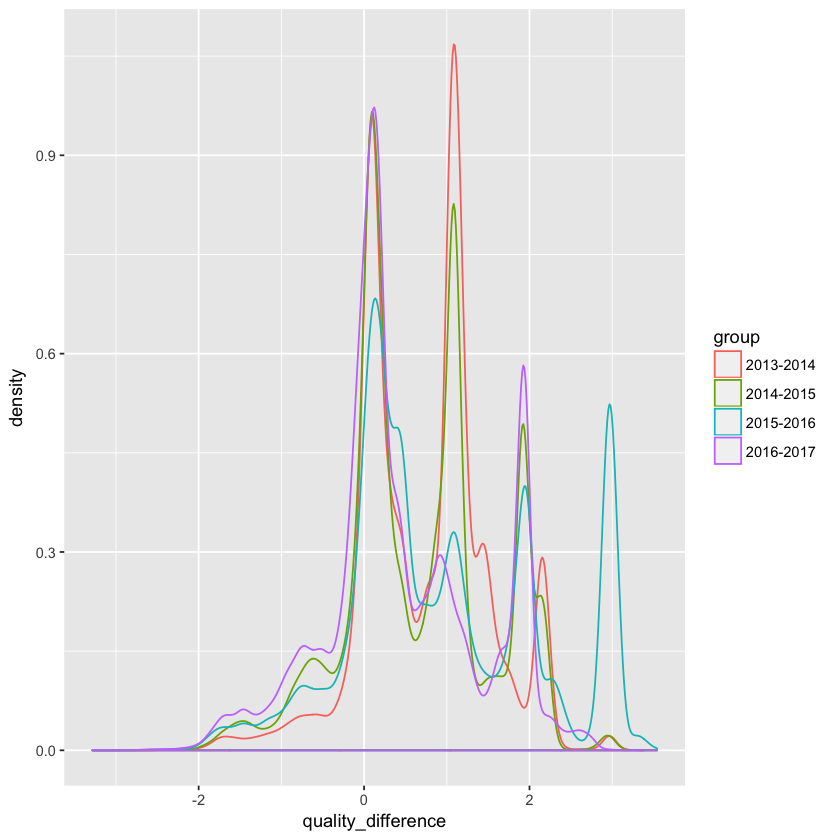

In [22]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [23]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'label',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'label',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'label',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'label',]$quality_difference)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.806000  0.005819  1.004000  0.531600  1.110000  3.309000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.94100  0.01569  0.94030  0.78780  1.88200  3.27700 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.93000  0.01235  1.02500  0.92820  1.97000  3.67600 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.522000  0.000635  0.436400  0.527400  1.263000  3.487000 

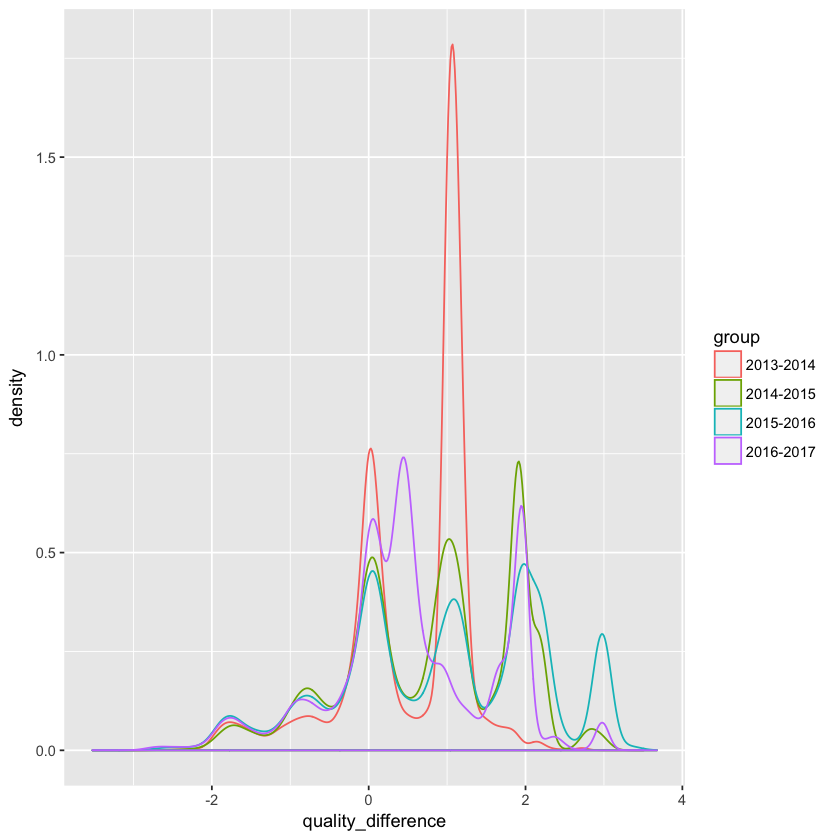

In [24]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [25]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'NULL',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'NULL',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'NULL',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'NULL',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.86800  0.06103  0.91290  0.59780  1.03900  3.27100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9670 -0.0109  0.4297  0.4944  1.1030  3.2860 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0400 -0.1053  0.2383  0.4124  1.0080  3.5590 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.01300 -0.18780  0.05076  0.10870  0.48420  3.53300 

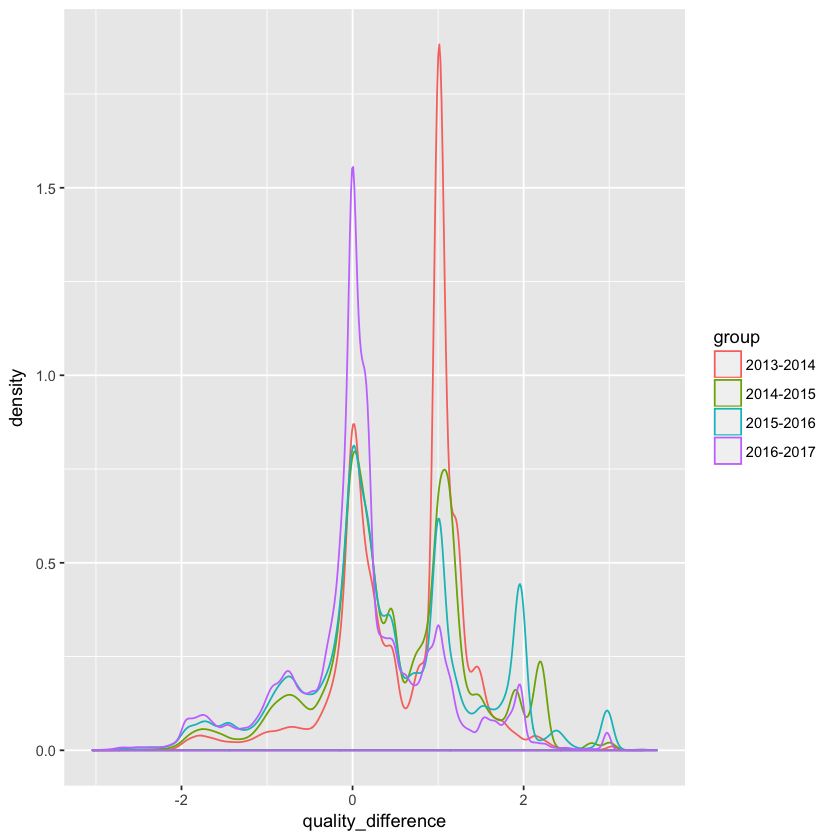

In [26]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [27]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'sitelink',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'sitelink',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'sitelink',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'sitelink',]$quality_difference)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.893000 -0.547800  0.009971 -0.019310  0.639000  3.097000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.96700 -0.66630  0.00812 -0.03544  0.67940  3.38900 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.98000 -0.69000  0.01650  0.01038  0.71240  3.30600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0490 -0.9111 -0.2210 -0.3286  0.1850  2.9720 

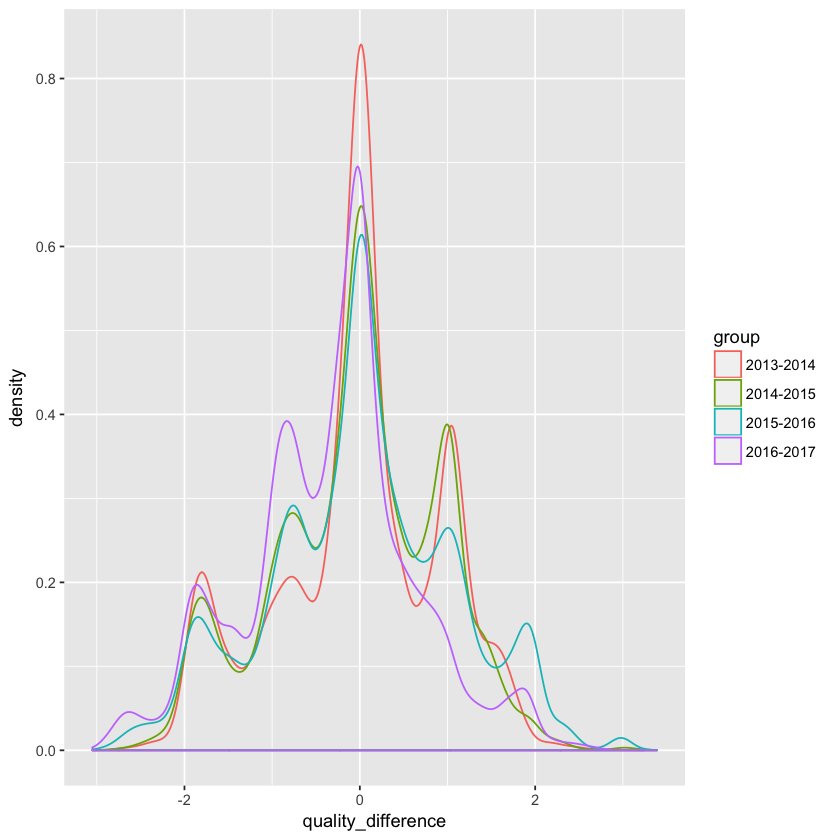

In [28]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [29]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'reference',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'reference',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'reference',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'reference',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.84600 -0.01173  0.19030  0.43410  1.12800  3.32000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.64400 -0.05923  0.59860  0.62500  1.27000  3.31500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9530 -0.1038  0.3396  0.5595  1.2460  3.5410 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8960 -0.4168  0.0914  0.1803  0.9000  3.6800 

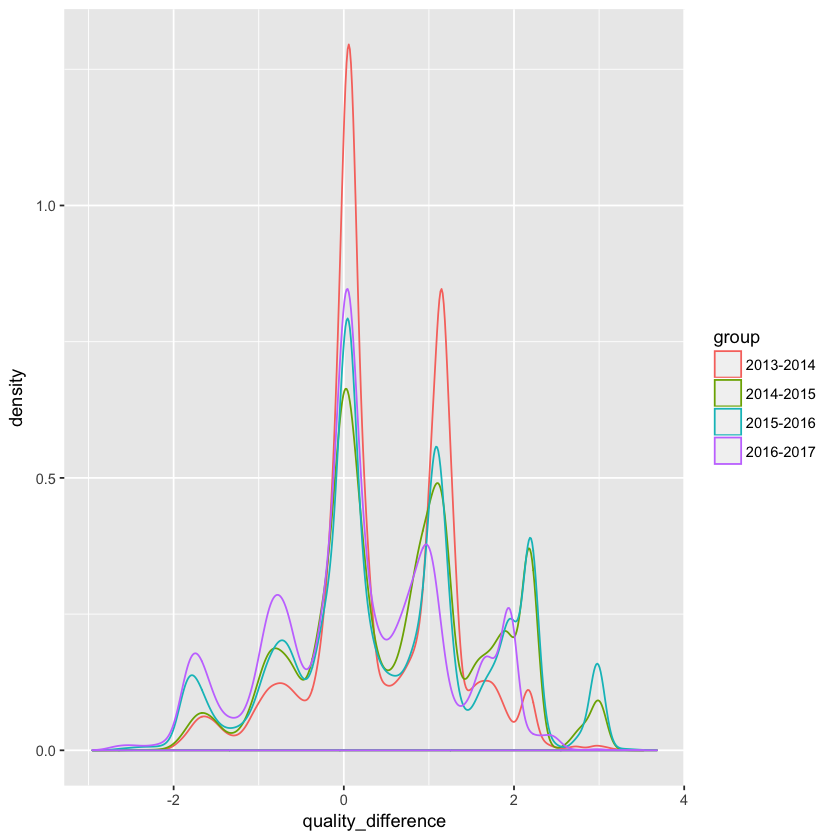

In [30]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [31]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'qualifier',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'qualifier',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'qualifier',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'qualifier',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.4960  0.5740  0.9684  0.9246  1.3010  2.5270 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.31600  0.09972  0.82930  0.69450  1.09600  2.98800 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.92500 -0.05827  0.06070  0.16720  0.46770  3.23900 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.84700  0.01403  0.39270  0.52750  1.04800  3.15900 

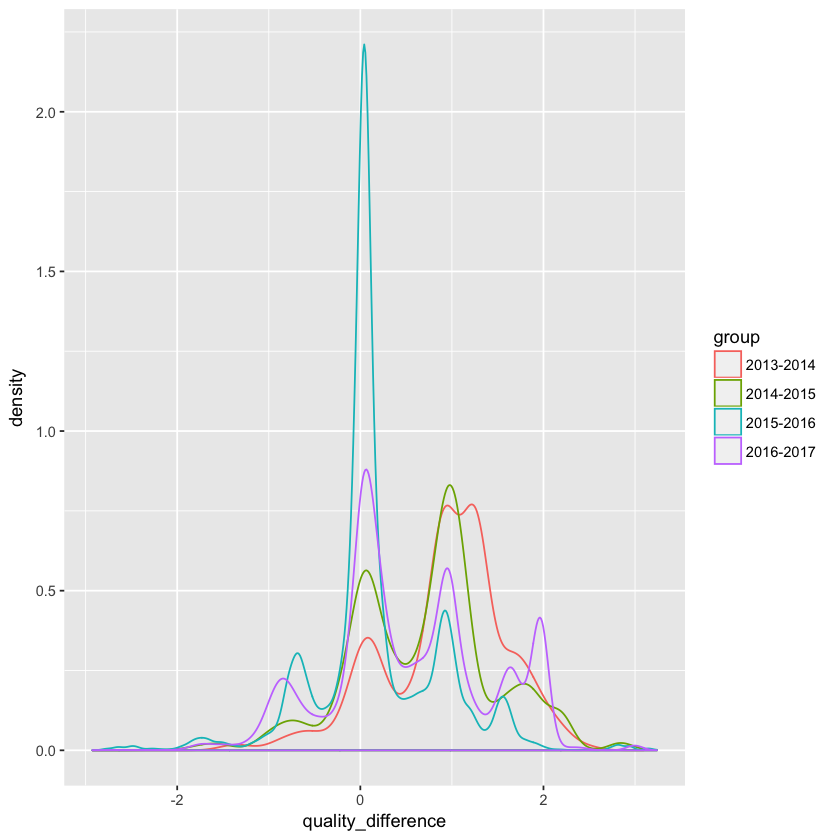

In [32]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [33]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'bot_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'bot_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'bot_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.86800  0.01662  0.47760  0.52850  1.11000  3.37200 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.93900  0.02494  0.66900  0.64230  1.17500  3.31500 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.98600  0.04286  0.66680  0.79780  1.74700  3.67600 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.98700 -0.07279  0.17140  0.37860  0.97590  3.68000 

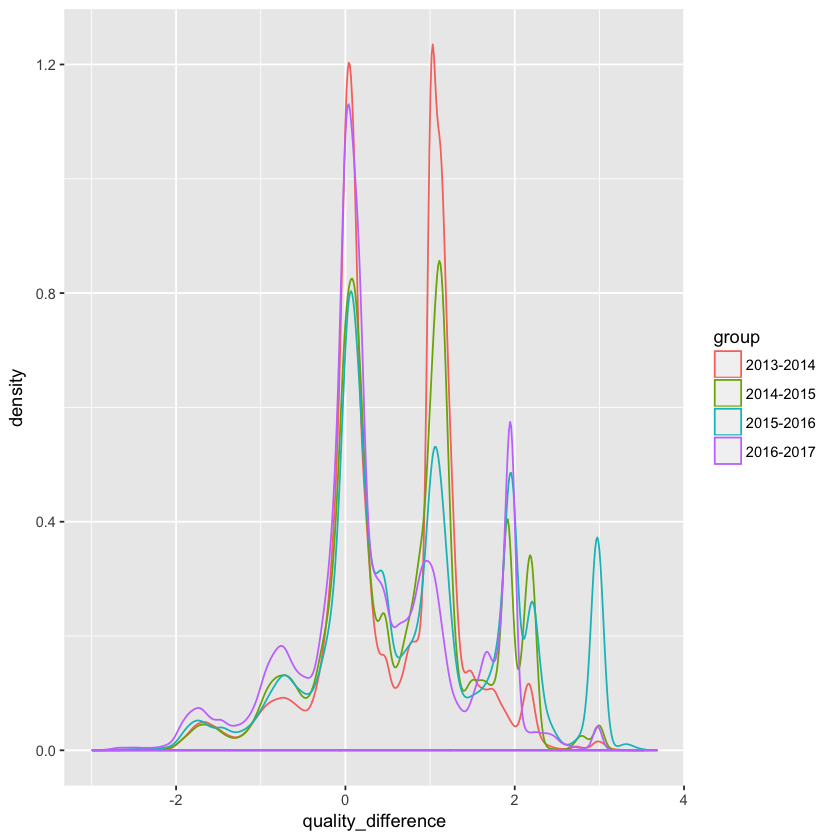

In [34]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [35]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'human_bot_like_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'human_bot_like_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'human_bot_like_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

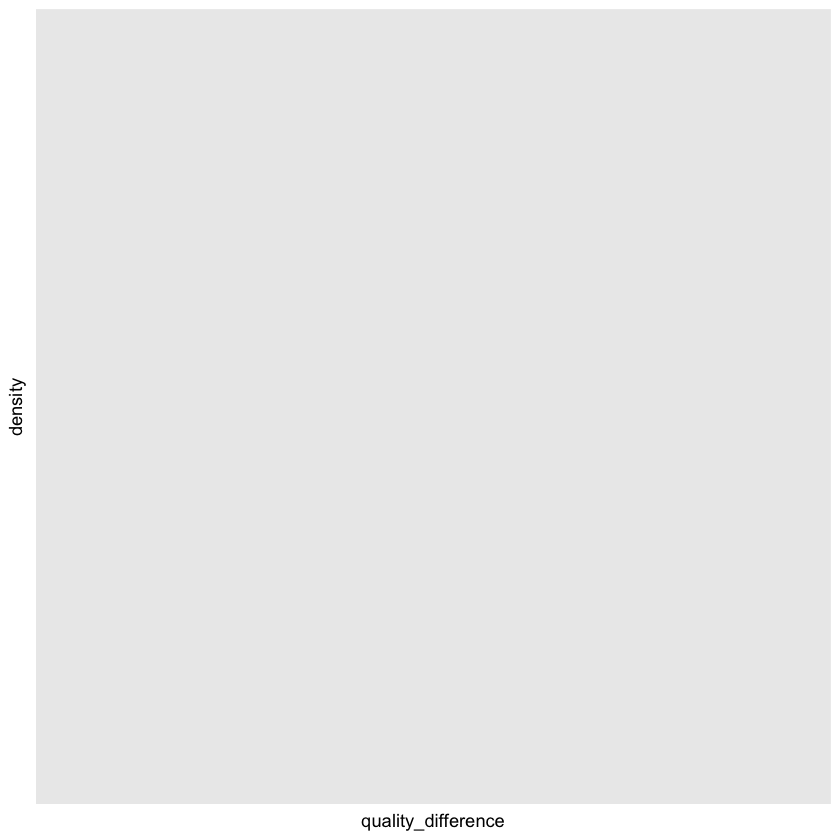

In [36]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [37]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'anon_bot_like_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'anon_bot_like_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'anon_bot_like_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

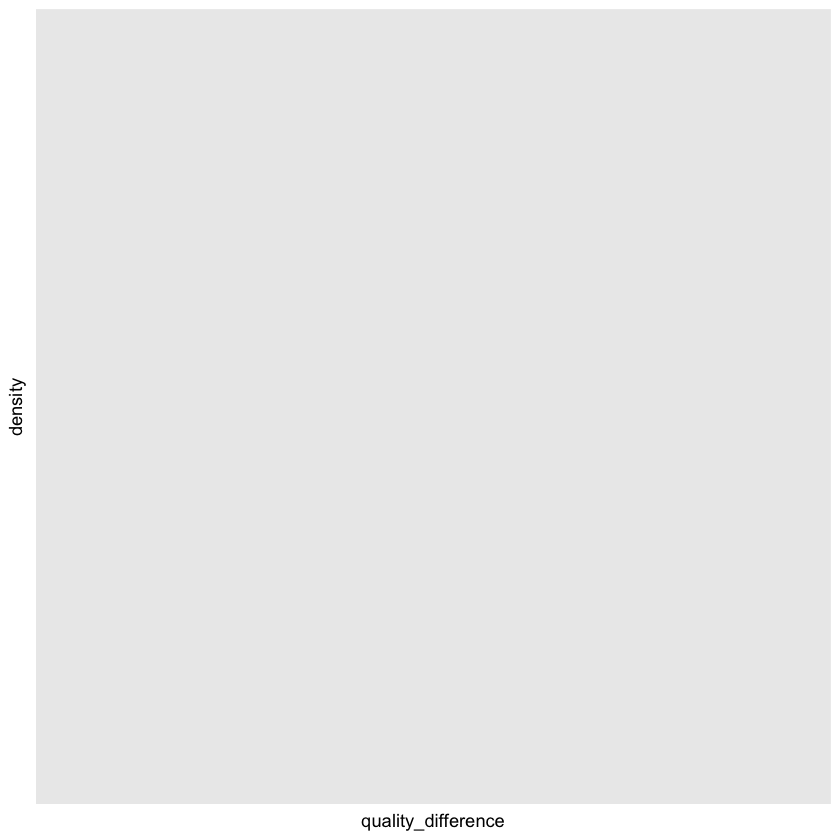

In [38]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [39]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'semi_automated_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'semi_automated_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'semi_automated_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit',]$quality_difference)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.797000 -0.177500  0.007843  0.130600  0.664100  3.271000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.967000 -0.311000  0.002958  0.062400  0.625200  3.263000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.94500 -0.66350  0.01454 -0.01155  0.72660  3.46600 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.12200 -0.36880  0.03952  0.04945  0.57290  3.12600 

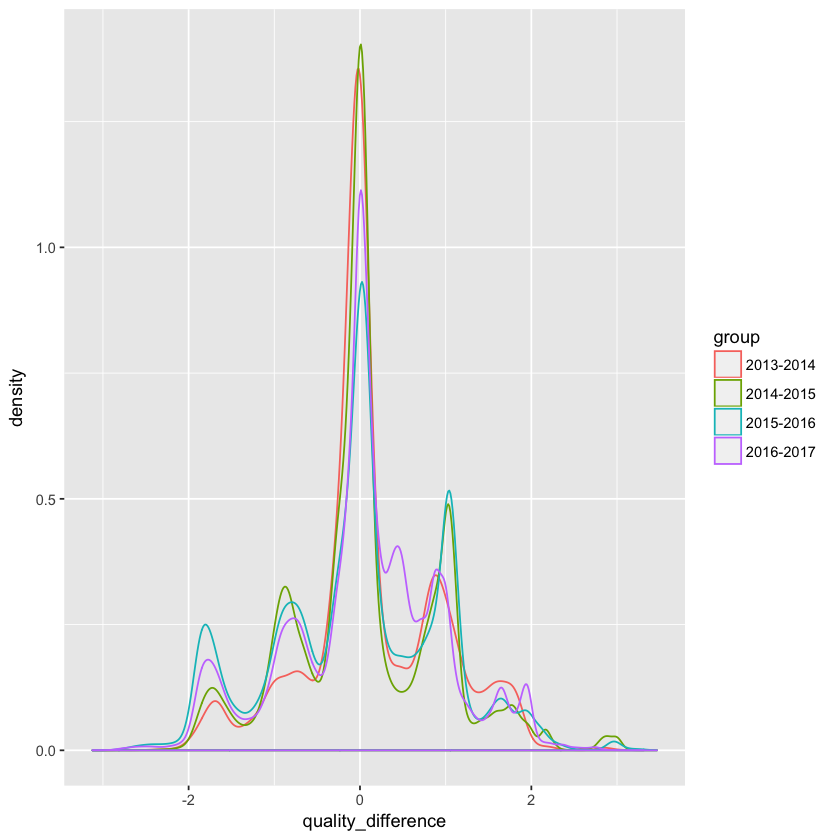

In [40]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [41]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'human_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'human_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'human_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8990 -0.2274  0.1020  0.1799  0.9516  3.1350 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.061000 -0.654100 -0.002515 -0.033430  0.625900  3.389000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0400 -0.8397 -0.1266 -0.2359  0.3010  3.3050 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.5220 -0.8672 -0.1571 -0.2802  0.2313  3.0210 

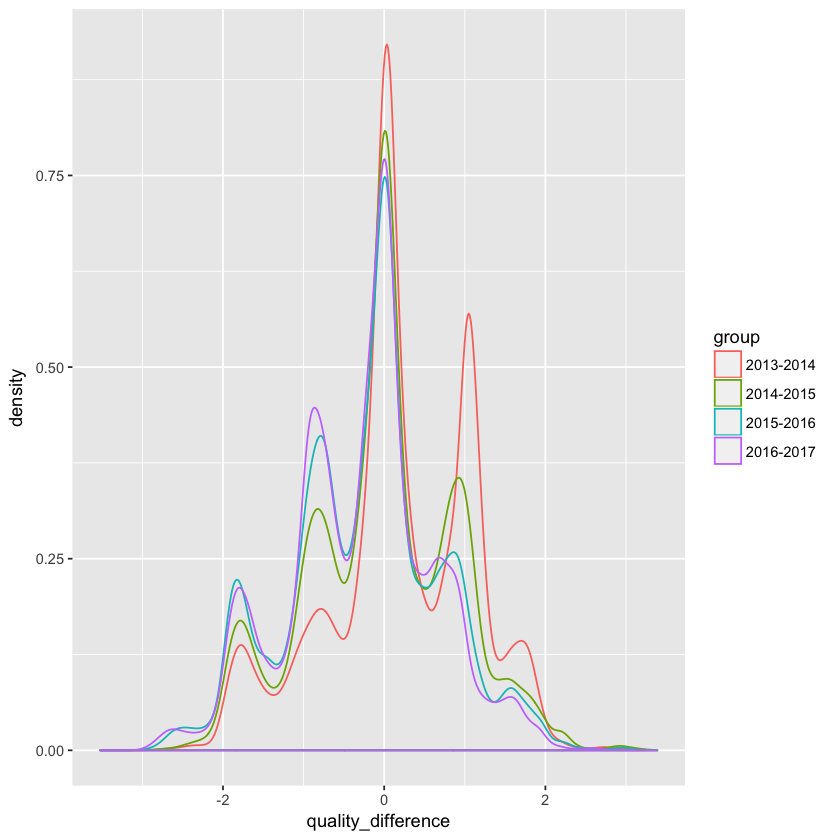

In [42]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [43]:
summary(revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'anon_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'anon_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'anon_edit',]$quality_difference)
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.7570 -0.9992 -0.1476 -0.3029  0.2252  2.9970 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9670 -0.9064 -0.2209 -0.3490  0.1526  2.5710 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.81800 -0.78840 -0.25310 -0.34500  0.06153  2.98400 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0490 -1.0860 -0.7095 -0.6676 -0.0754  1.9870 

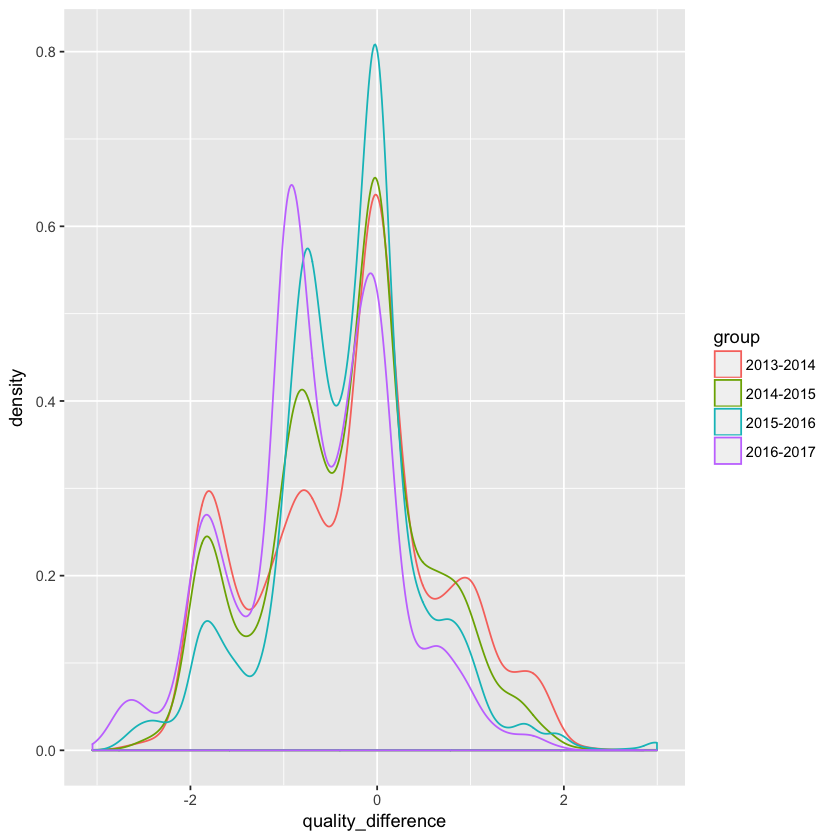

In [44]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [45]:
print("Summaries for futher 2016-2017 breakdowns")

# bot automated edits
print("bot edits, sitelink")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)
print("bot edits, aliases")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)
print("bot edits, label")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)
print("bot edits, description")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)
print("bot edits, reference")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)
print("bot edits, qualifier")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)
print("bot edits, claim")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)
print("bot edits, NULL")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference)

# human_bot_like edits
print("human_bot_like edits, sitelink")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)
print("human_bot_like edits, aliases")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)
print("human_bot_like edits, label")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)
print("human_bot_like edits, description")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)
print("human_bot_like edits, reference")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)
print("human_bot_like edits, qualifier")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)
print("human_bot_like edits, claim")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)
print("human_bot_like edits, NULL")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit'
                                                                      ,]$quality_difference)

# anon_bot_like edits
print("anon_bot_like edits, sitelink")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)
print("anon_bot_like edits, aliases")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)
print("anon_bot_like edits, label")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)
print("anon_bot_like edits, description")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)
print("anon_bot_like edits, reference")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)
print("anon_bot_like edits, qualifier")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)
print("anon_bot_like edits, claim")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)
print("anon_bot_like edits, NULL")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit'
                                                                      ,]$quality_difference)

# semi automated edits
print("semi automated edits, sitelink")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, aliases")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, label")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, description")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, reference")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, qualifier")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, claim")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, NULL")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)

# human edits
print("human edits, sitelink")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, aliases")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, label")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, description")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, reference")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, qualifier")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, claim")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, NULL")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference)


# anon edits
print("anon edits, sitelink")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, aliases")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, label")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, description")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, reference")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, qualifier")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, claim")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, NULL")
summary(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)


[1] "Summaries for futher 2016-2017 breakdowns"
[1] "bot edits, sitelink"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9680 -0.1179  0.1458  0.3489  1.2580  2.6000 

[1] "bot edits, aliases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8550 -0.1939  0.1998  0.2325  0.8298  2.7880 

[1] "bot edits, label"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9290  0.1563  1.7300  1.1310  1.9590  3.4870 

[1] "bot edits, description"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.81200 -0.02303  0.19990  0.47060  1.08100  2.99800 

[1] "bot edits, reference"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.89600 -0.01109  0.39370  0.49870  1.12300  3.68000 

[1] "bot edits, qualifier"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.35900  0.02674  0.39360  0.58170  1.20300  3.15900 

[1] "bot edits, claim"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9060 -0.1202  0.1304  0.3257  0.9562  3.3320 

[1] "bot edits, NULL"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.98700 -0.13610  0.08106  0.16220  0.54410  3.53300 

[1] "human_bot_like edits, sitelink"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "human_bot_like edits, aliases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "human_bot_like edits, label"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "human_bot_like edits, description"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "human_bot_like edits, reference"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "human_bot_like edits, qualifier"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "human_bot_like edits, claim"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "human_bot_like edits, NULL"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, sitelink"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, aliases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, label"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, description"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, reference"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, qualifier"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, claim"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon_bot_like edits, NULL"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "semi automated edits, sitelink"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.85700 -0.29080 -0.02002  0.07163  0.60030  2.50700 

[1] "semi automated edits, aliases"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.79400 -0.60270  0.03370 -0.06515  0.29060  2.08600 

[1] "semi automated edits, label"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.99400  0.06256  0.39530  0.36040  0.58240  2.72800 

[1] "semi automated edits, description"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.89200 -0.02995  0.37460  0.54850  1.15900  3.12600 

[1] "semi automated edits, reference"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.86300 -0.82400 -0.07101 -0.22170  0.26950  2.62700 

[1] "semi automated edits, qualifier"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.84700 -0.07653  0.41060  0.35890  0.96290  2.29100 

[1] "semi automated edits, claim"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.12200 -0.66890 -0.02172 -0.13540  0.27600  2.96600 

[1] "semi automated edits, NULL"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.006000 -0.374700 -0.053260 -0.218100 -0.002515  2.323000 

[1] "human edits, sitelink"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0030 -0.9750 -0.3002 -0.4263  0.1160  2.9720 

[1] "human edits, aliases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9490 -0.8706 -0.1342 -0.2178  0.3539  2.6580 

[1] "human edits, label"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.5220 -1.0180 -0.2984 -0.4175  0.1469  2.7170 

[1] "human edits, description"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.28300 -0.78710 -0.05168 -0.10470  0.49760  2.84800 

[1] "human edits, reference"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.73000 -0.60040 -0.08129 -0.20240  0.14910  2.24600 

[1] "human edits, qualifier"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.88700 -0.16020  0.09925  0.10040  0.63060  1.69900 

[1] "human edits, claim"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.31400 -0.80460 -0.09421 -0.20620  0.34330  2.94900 

[1] "human edits, NULL"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0130 -0.9238 -0.2349 -0.3969  0.0985  3.0210 

[1] "anon edits, sitelink"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.04900 -1.02400 -0.50500 -0.59630 -0.03143  1.93100 

[1] "anon edits, aliases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9330 -1.1810 -0.8677 -0.7999 -0.3164  1.9870 

[1] "anon edits, label"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9910 -1.6170 -0.9107 -0.9326 -0.2761  1.5570 

[1] "anon edits, description"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.63100 -1.03700 -0.71040 -0.58830 -0.03403  1.88200 

[1] "anon edits, reference"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon edits, qualifier"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon edits, claim"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.90500 -1.01400 -0.64340 -0.57720 -0.02347  1.91000 

[1] "anon edits, NULL"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9830 -1.8340 -1.0300 -1.0260 -0.3024  1.7930 

# Breakdown plots by agent type and edit type

## Bot edits

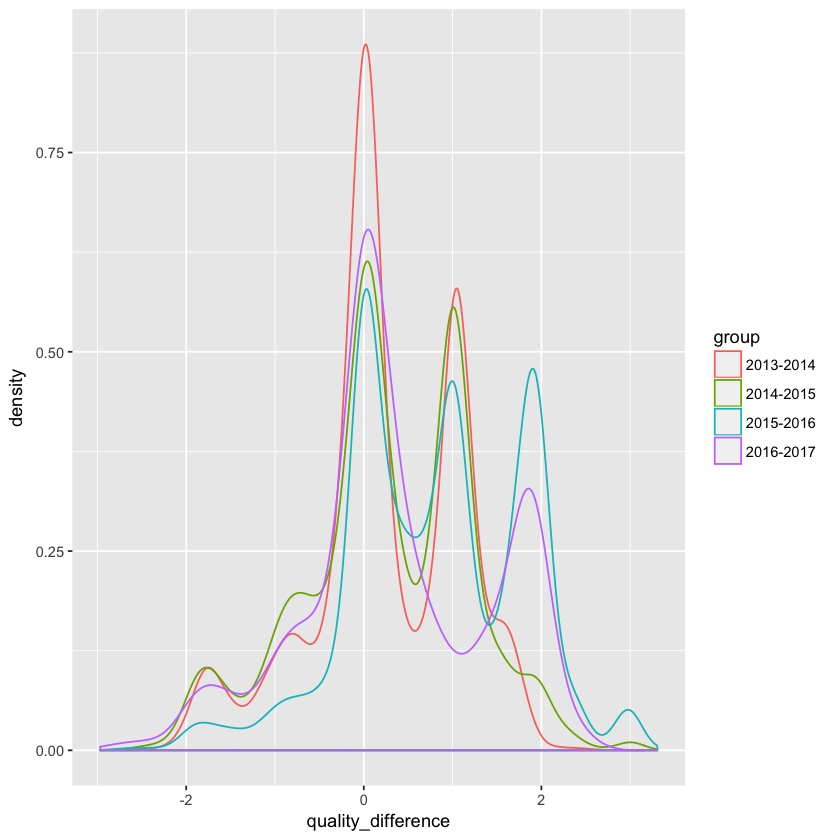

In [46]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

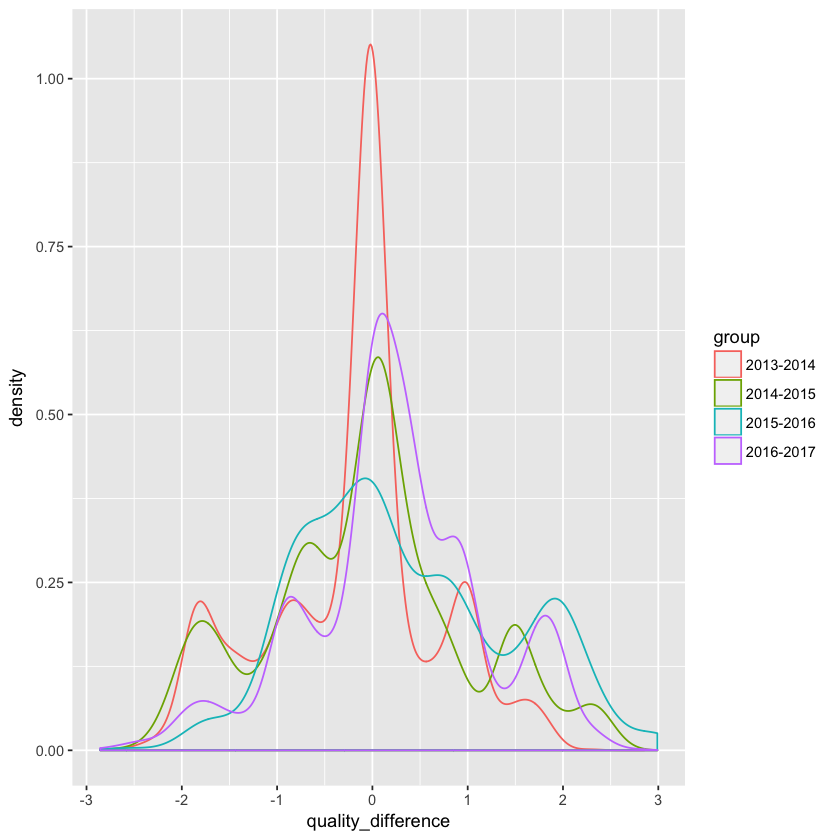

In [47]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

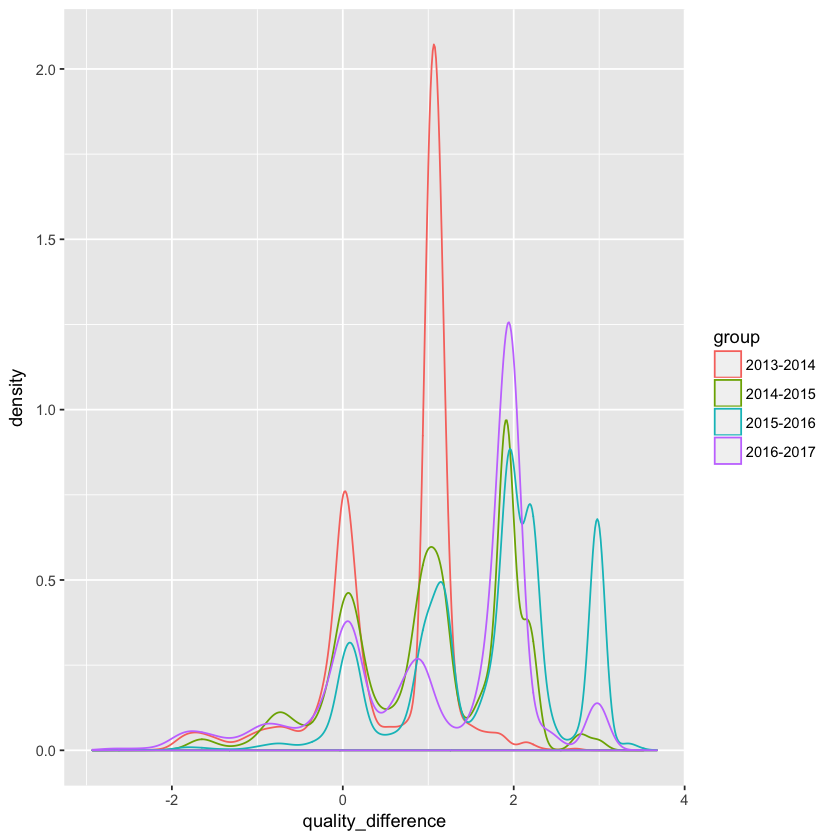

In [48]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

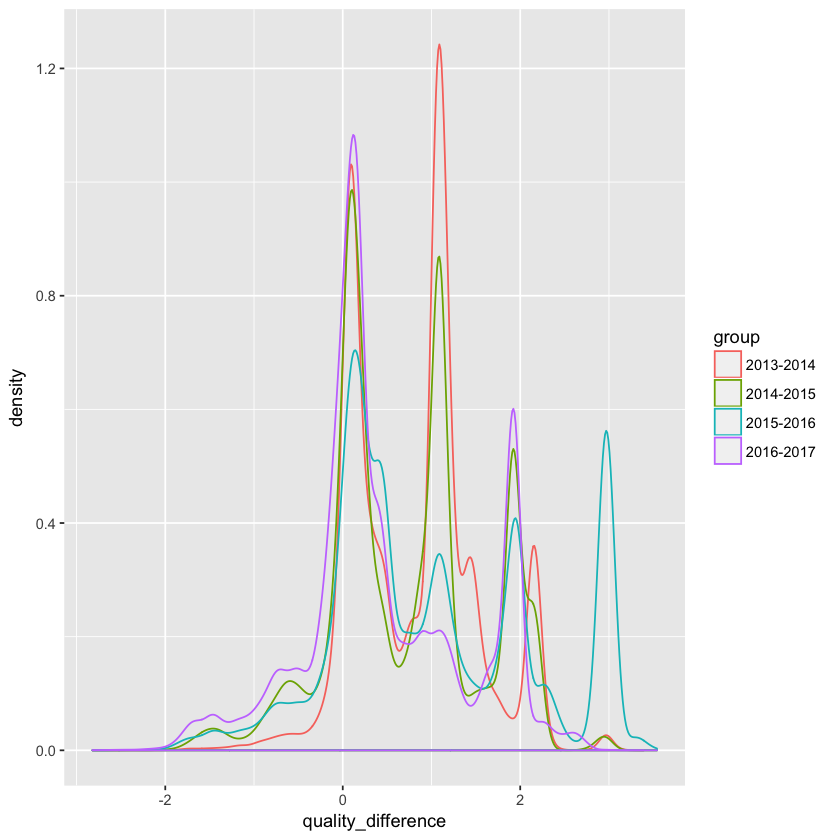

In [49]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

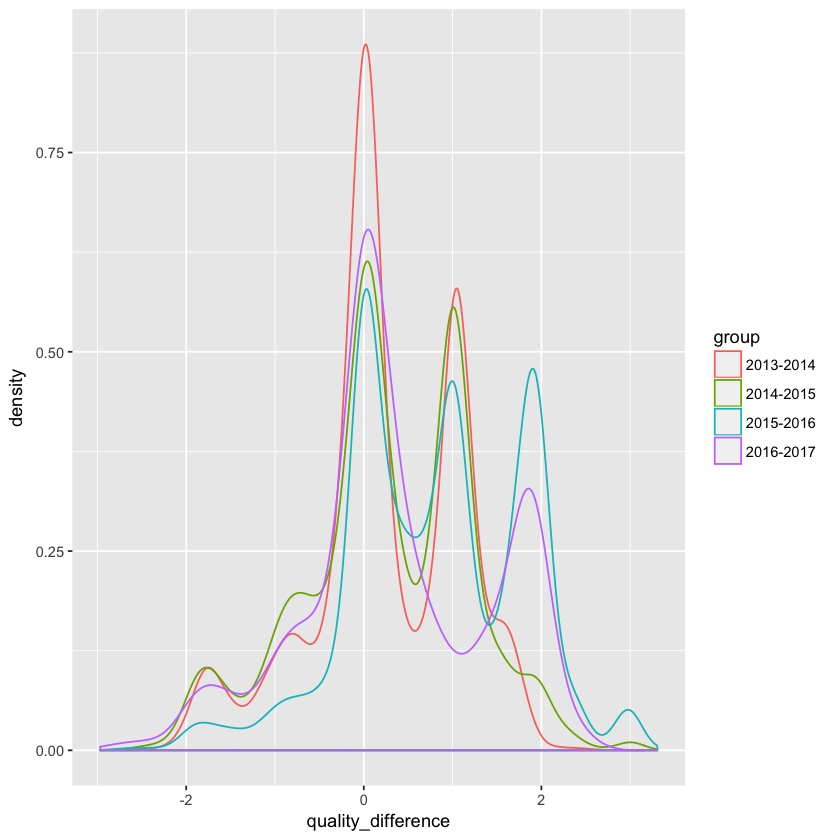

In [50]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

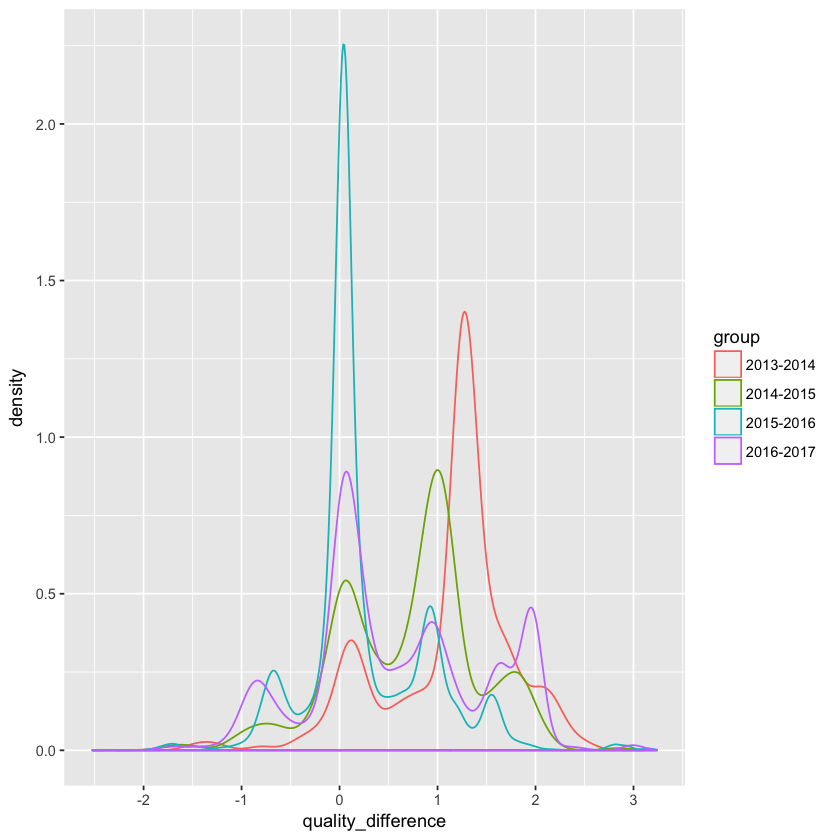

In [51]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

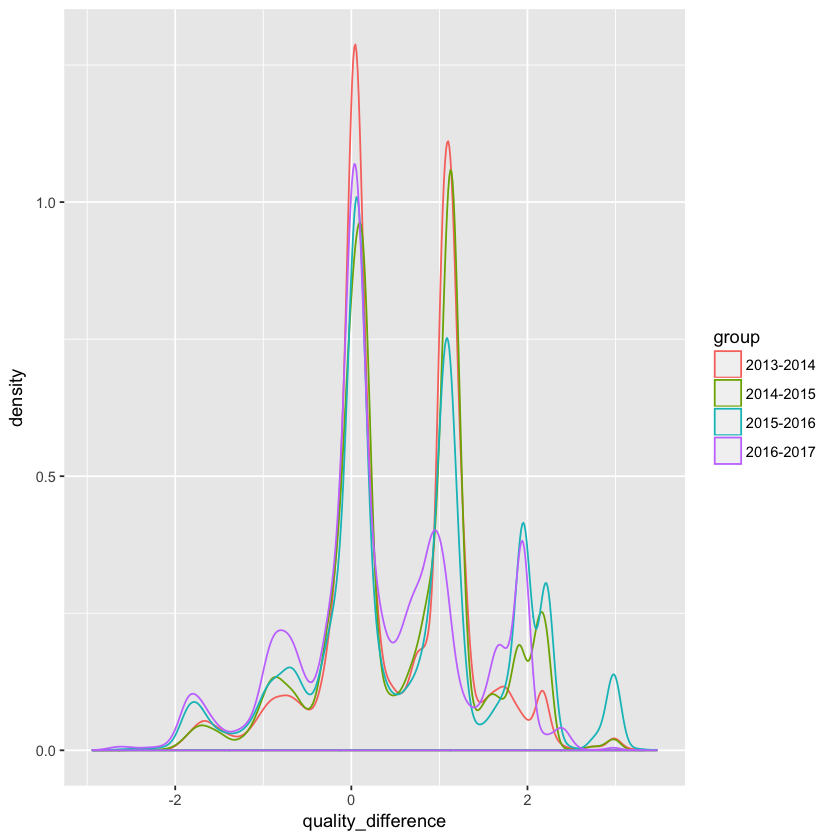

In [52]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

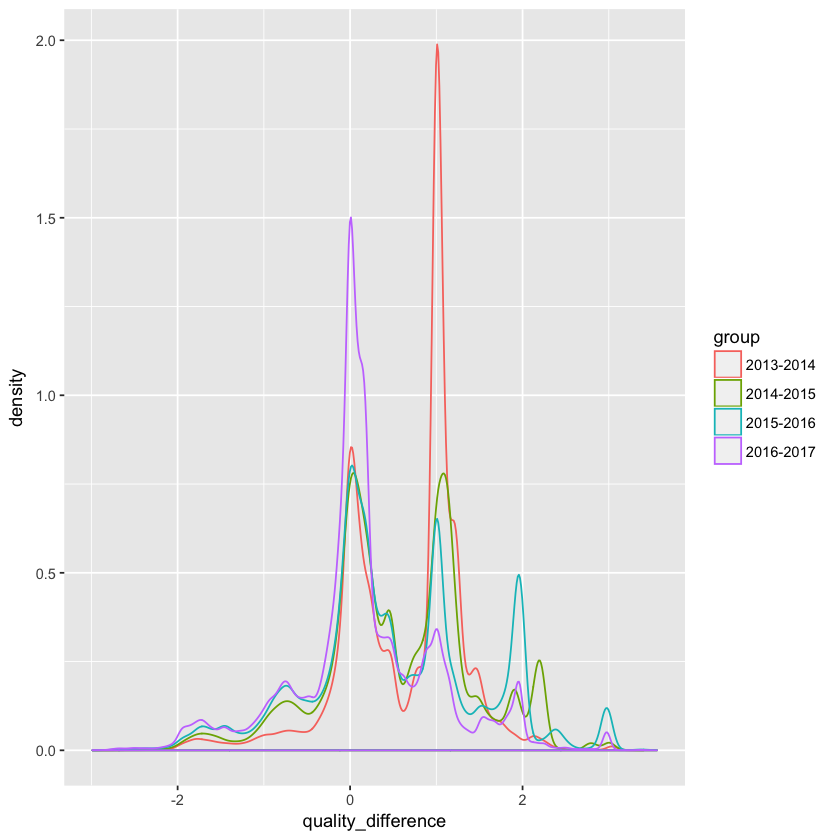

In [53]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

## Human Bot-Like edits

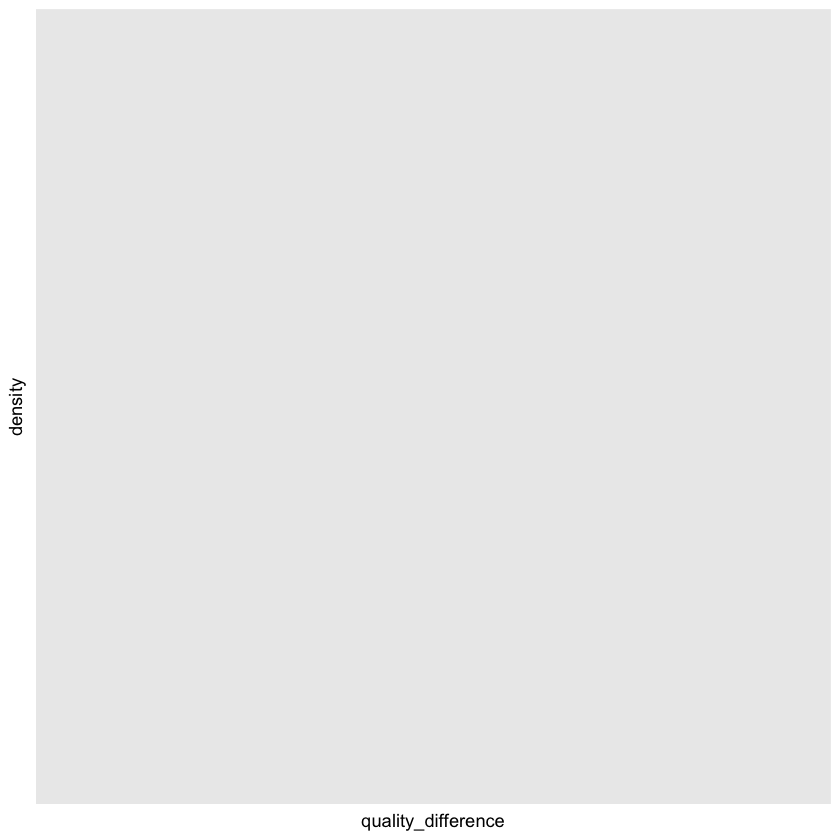

In [54]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

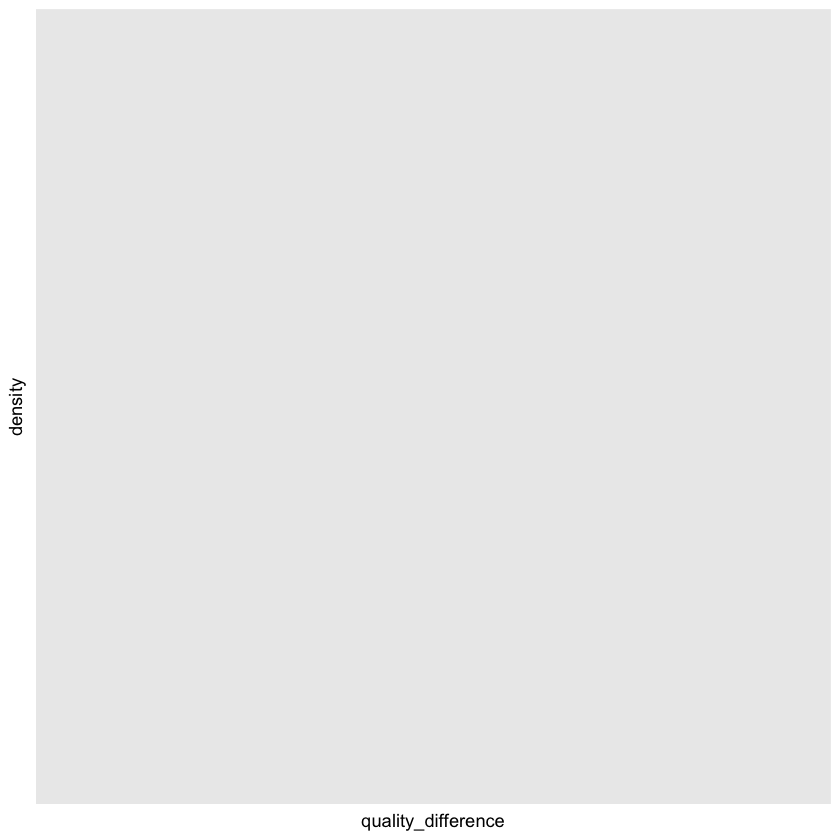

In [55]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

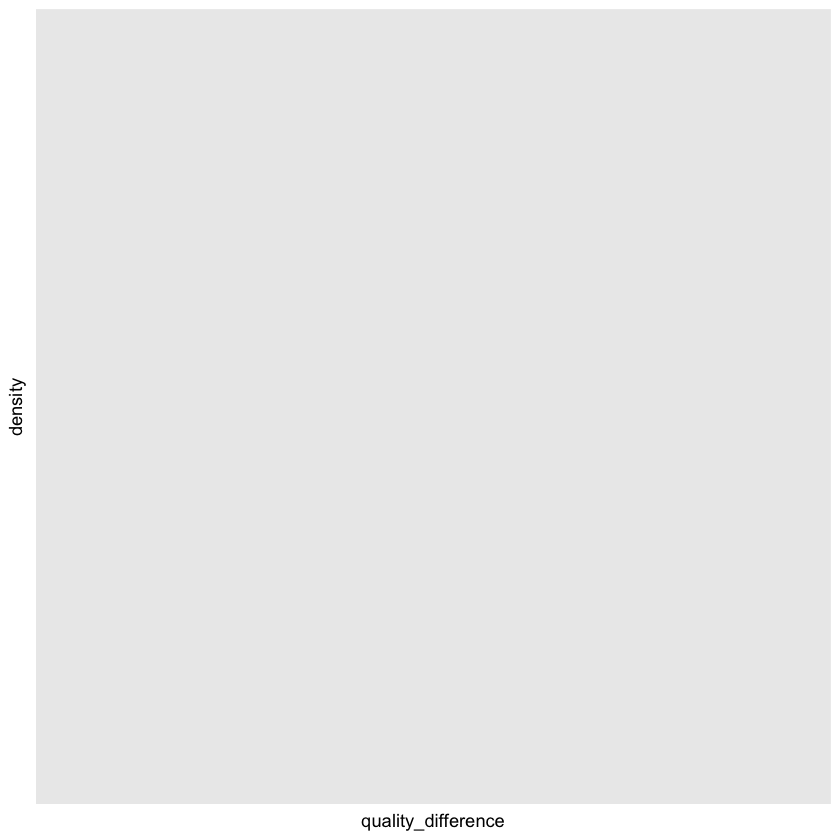

In [56]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

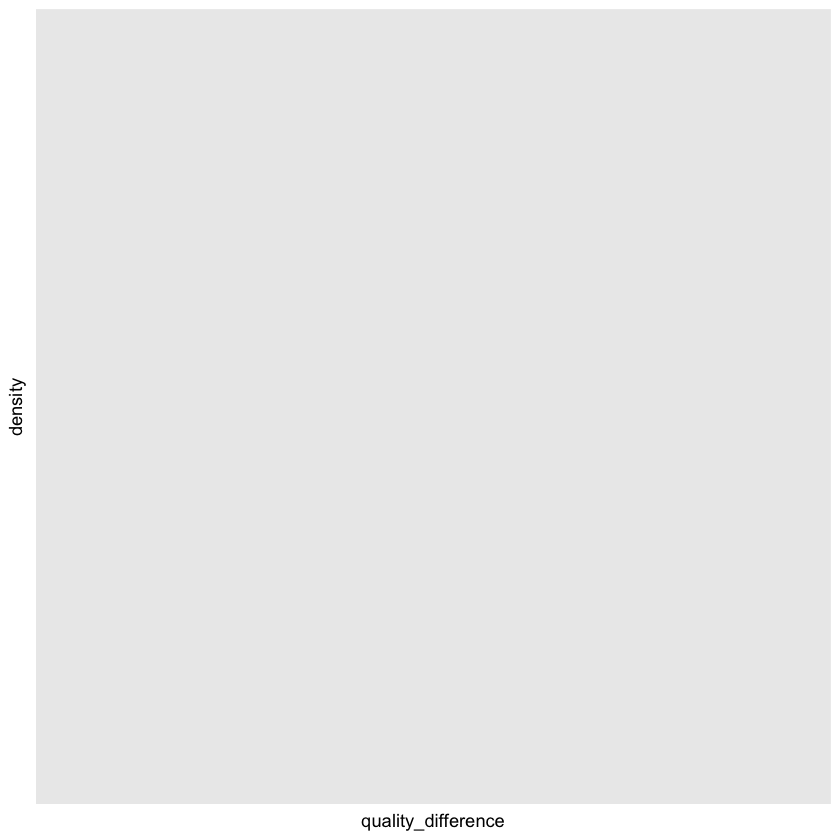

In [57]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

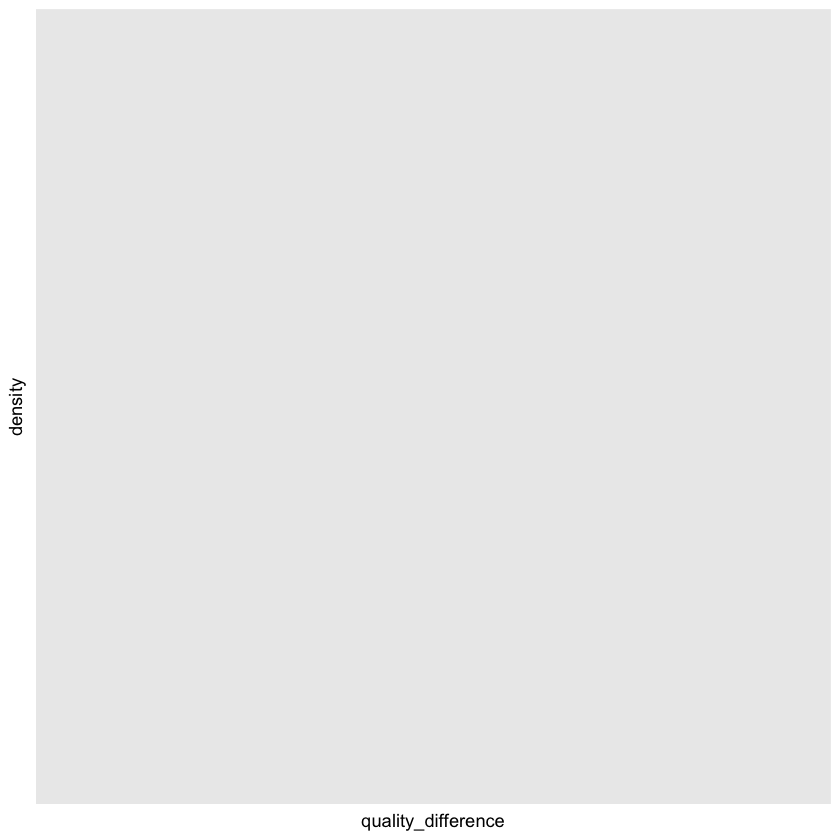

In [58]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

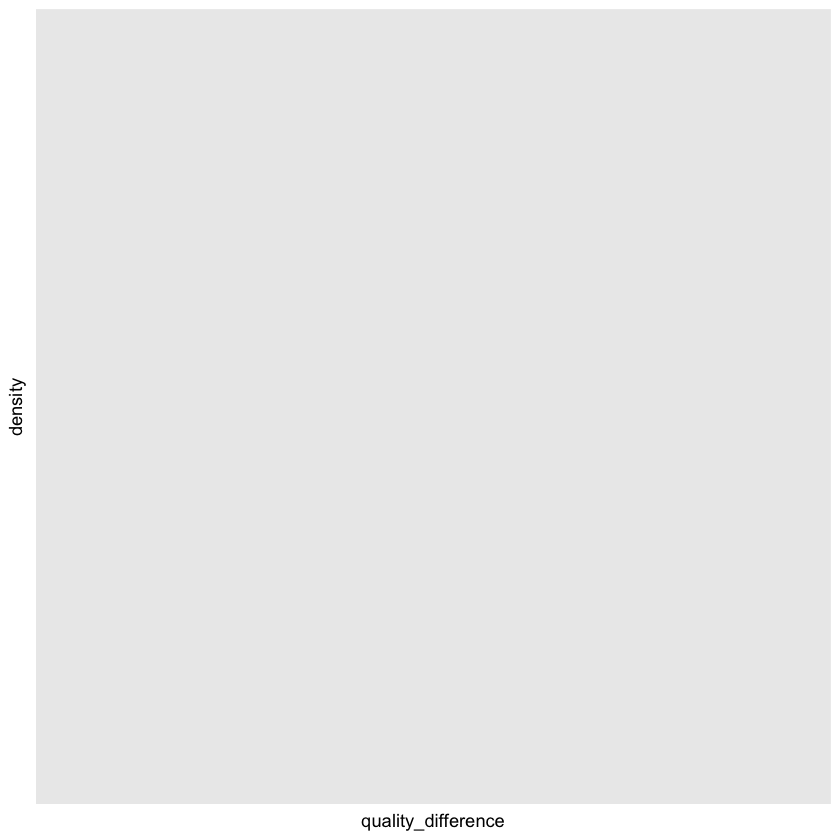

In [59]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

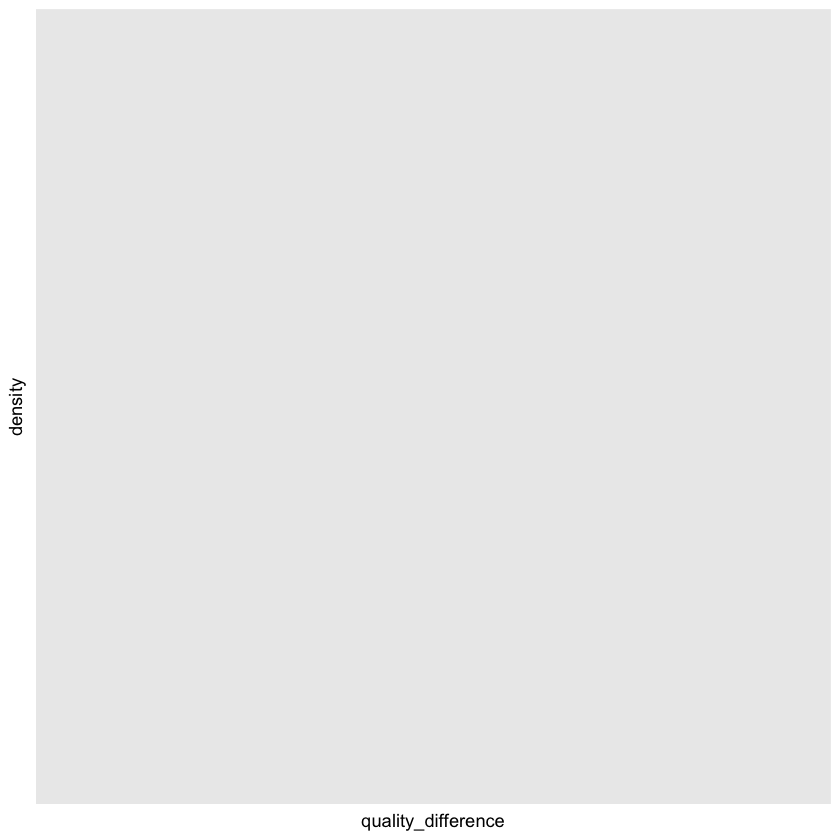

In [60]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

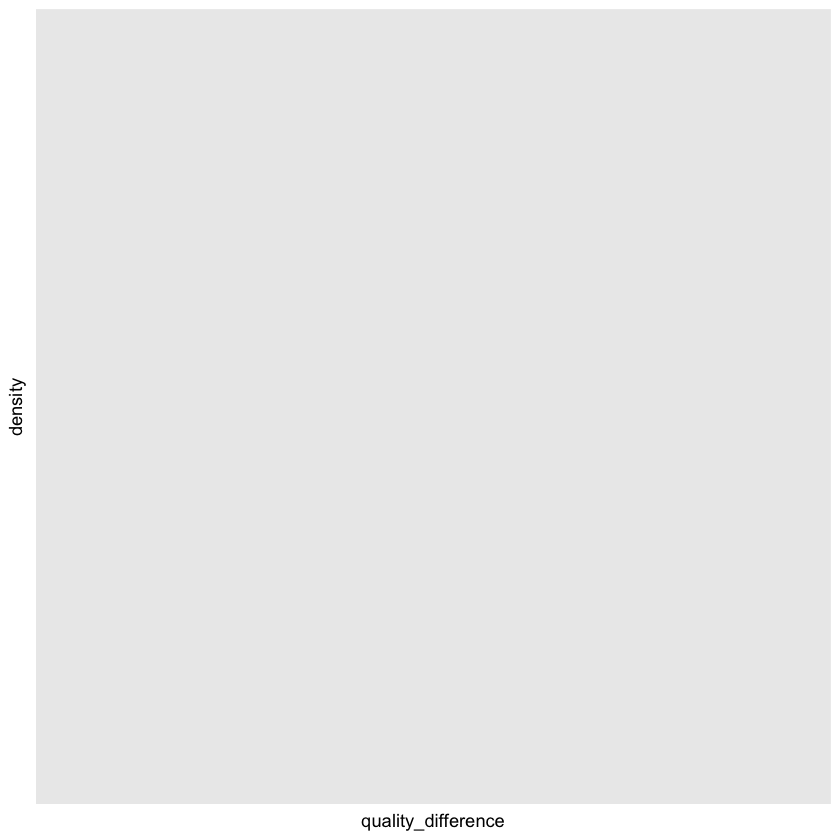

In [61]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

## Anon Bot-Like edits

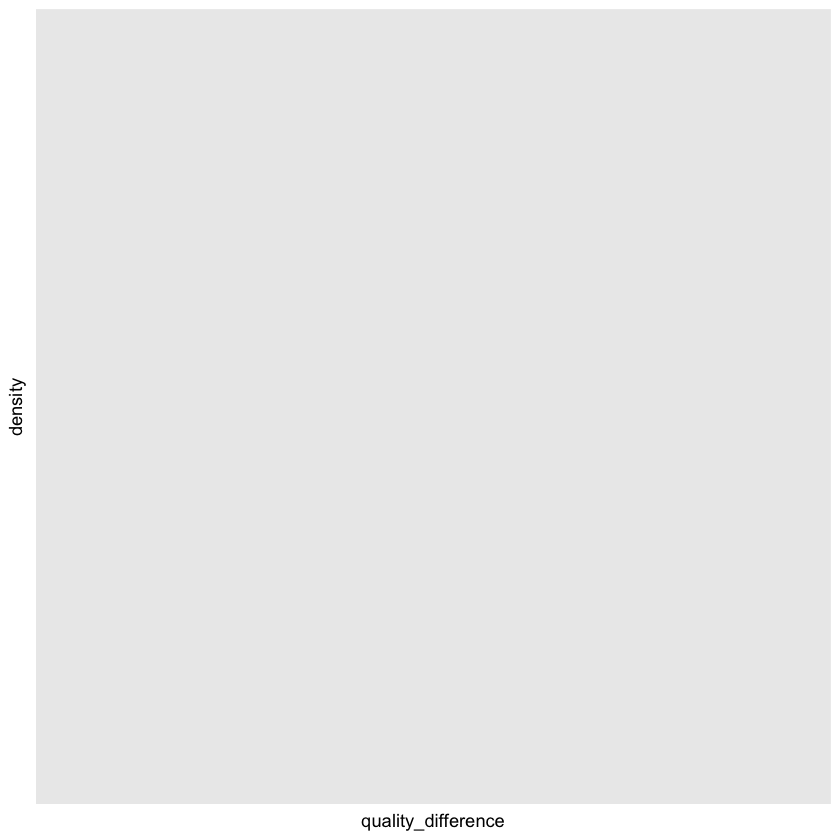

In [62]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

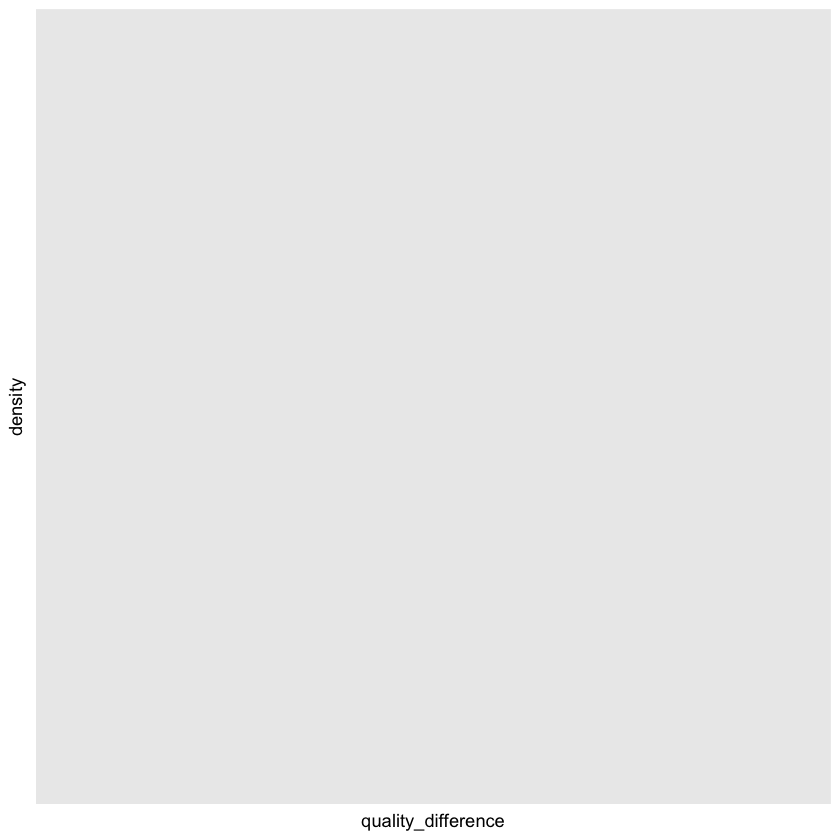

In [63]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

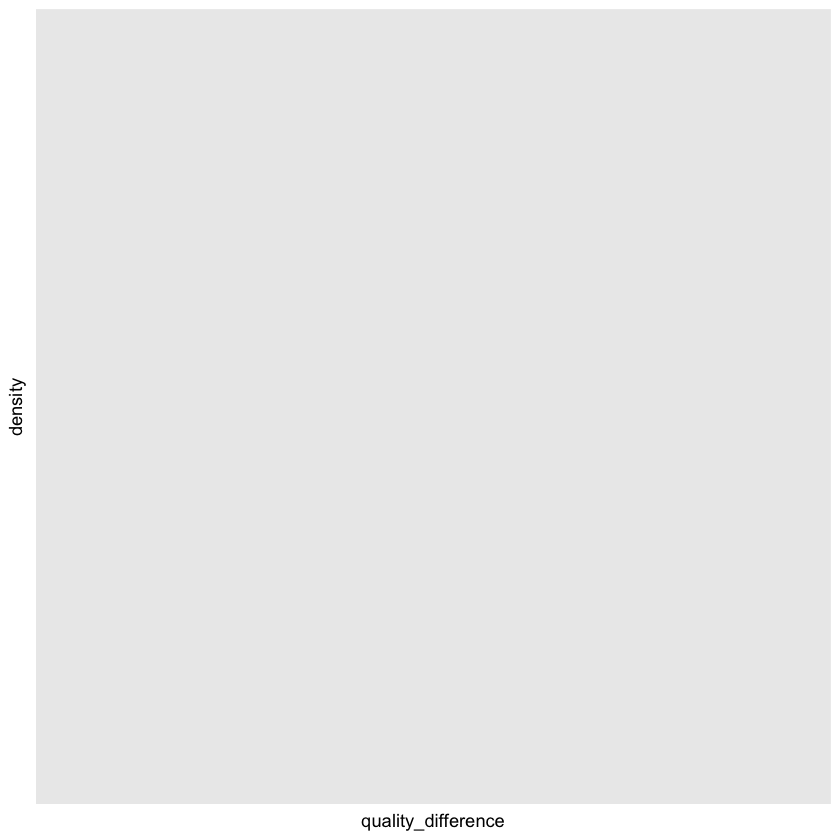

In [64]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

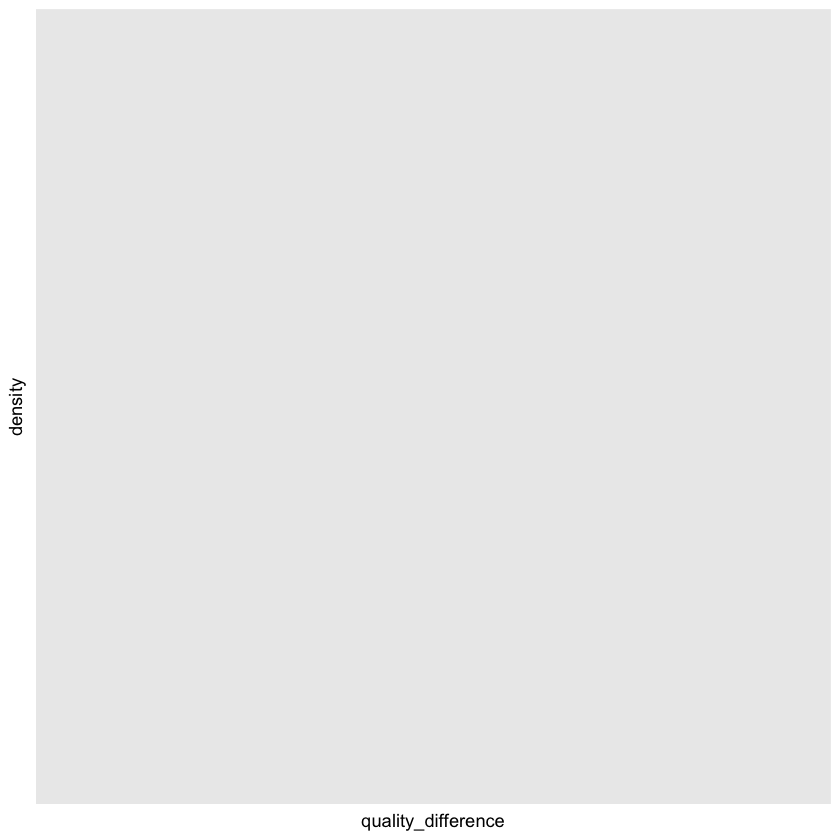

In [65]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

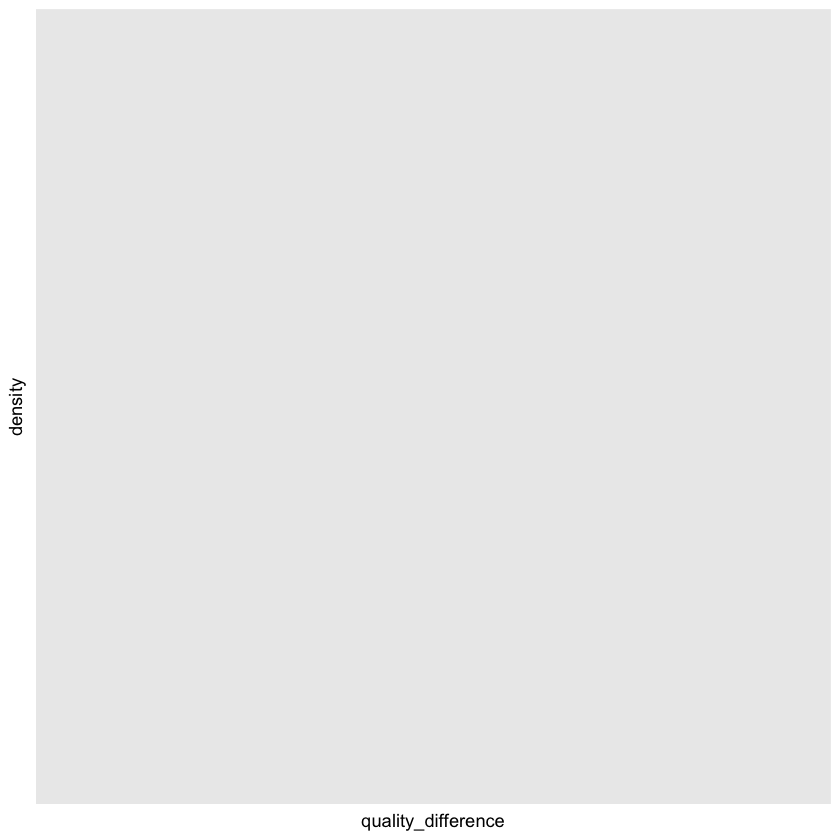

In [66]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

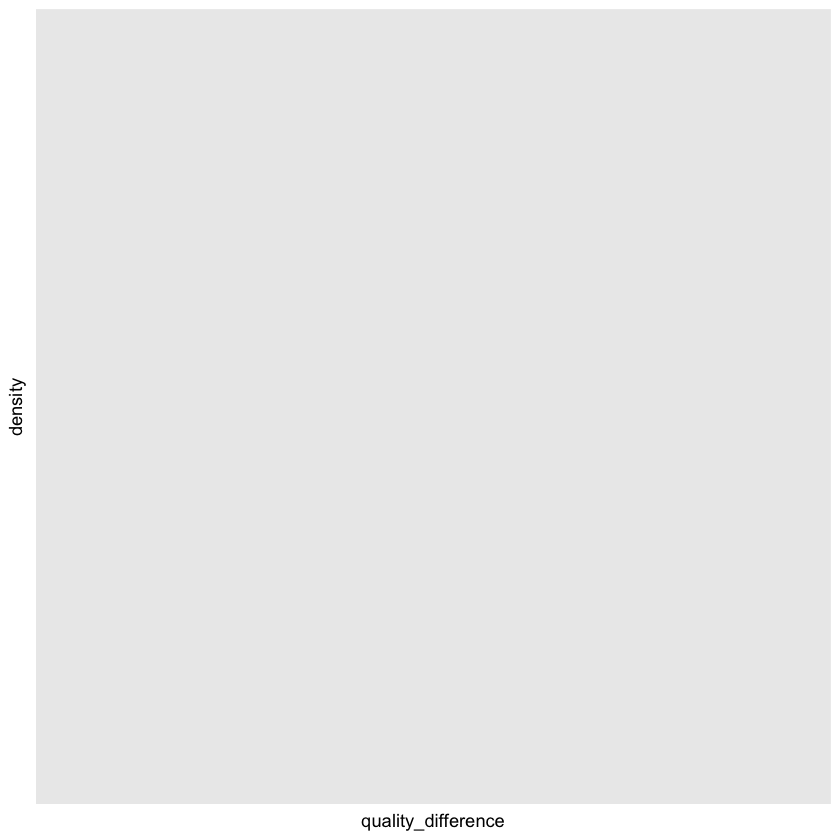

In [67]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

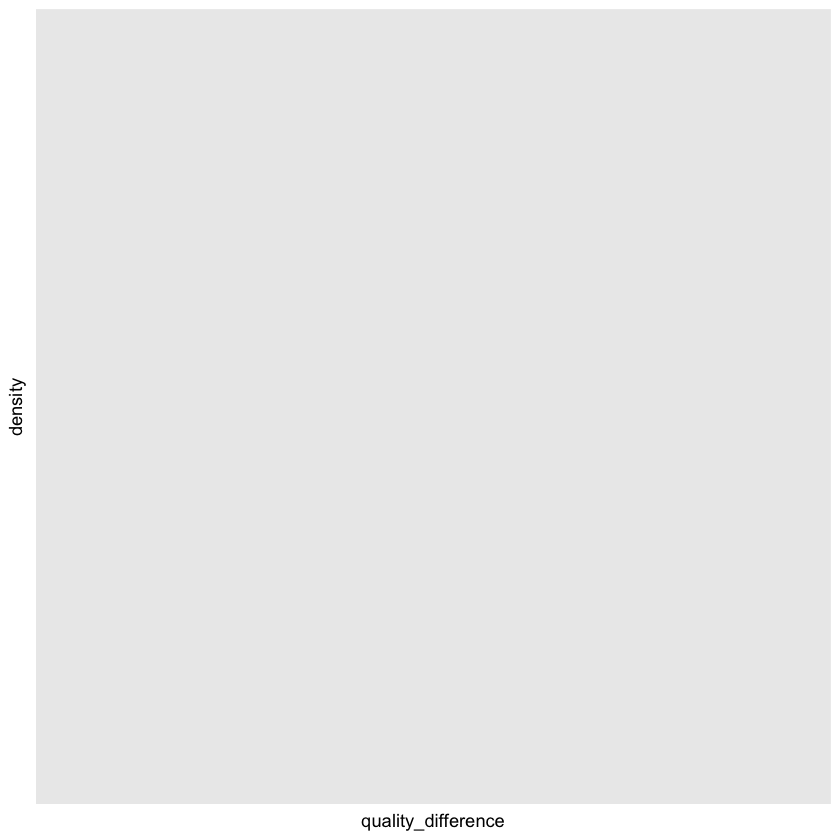

In [68]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

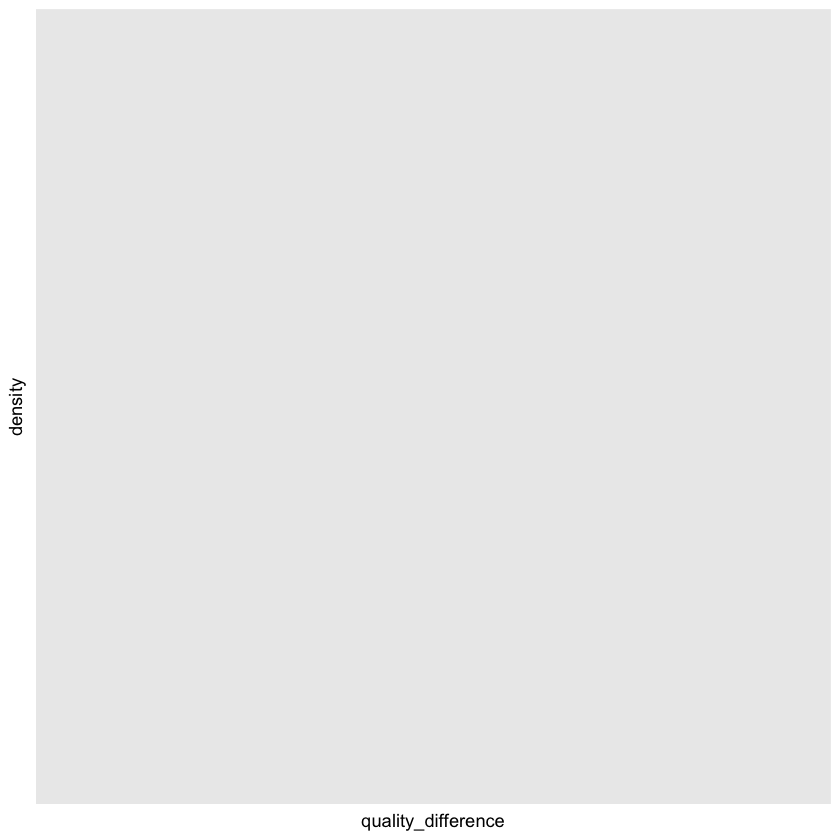

In [69]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_bot_like_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

## Semi-automated edits

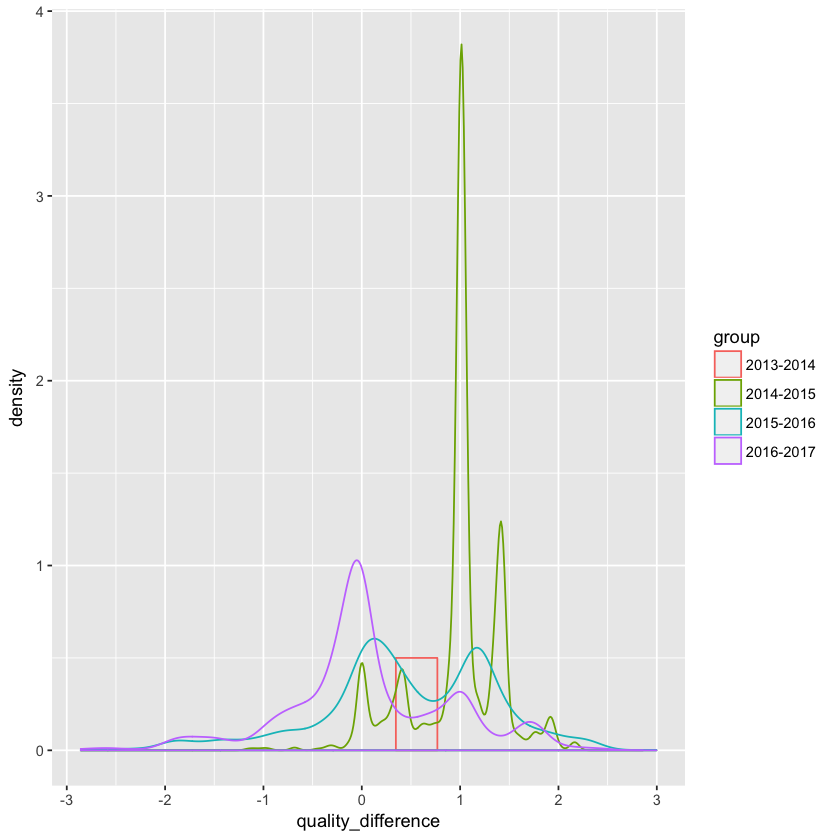

In [70]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

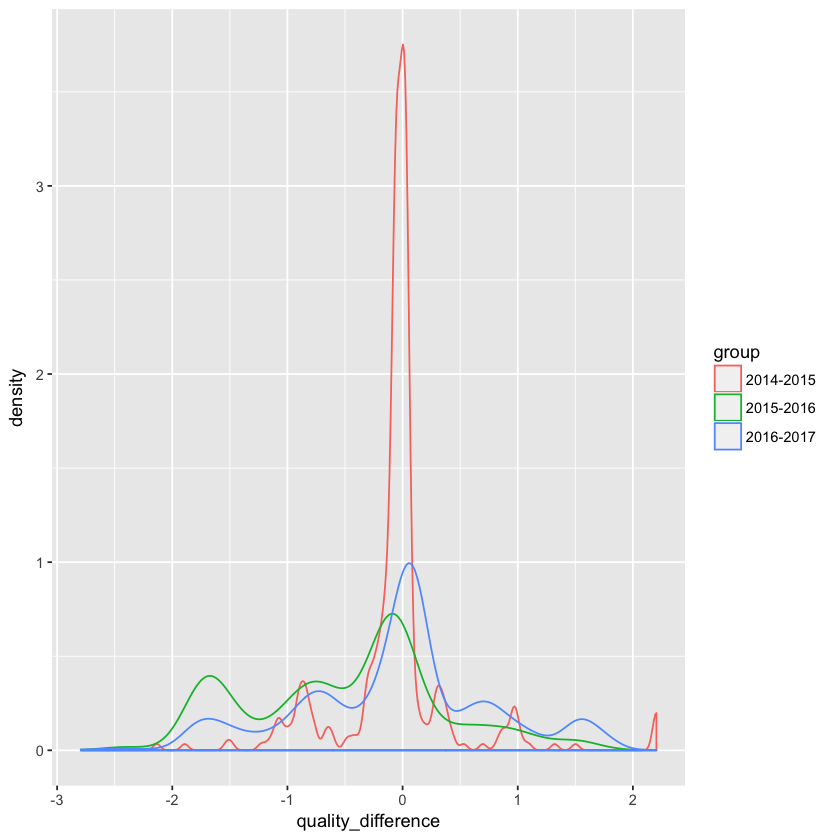

In [71]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

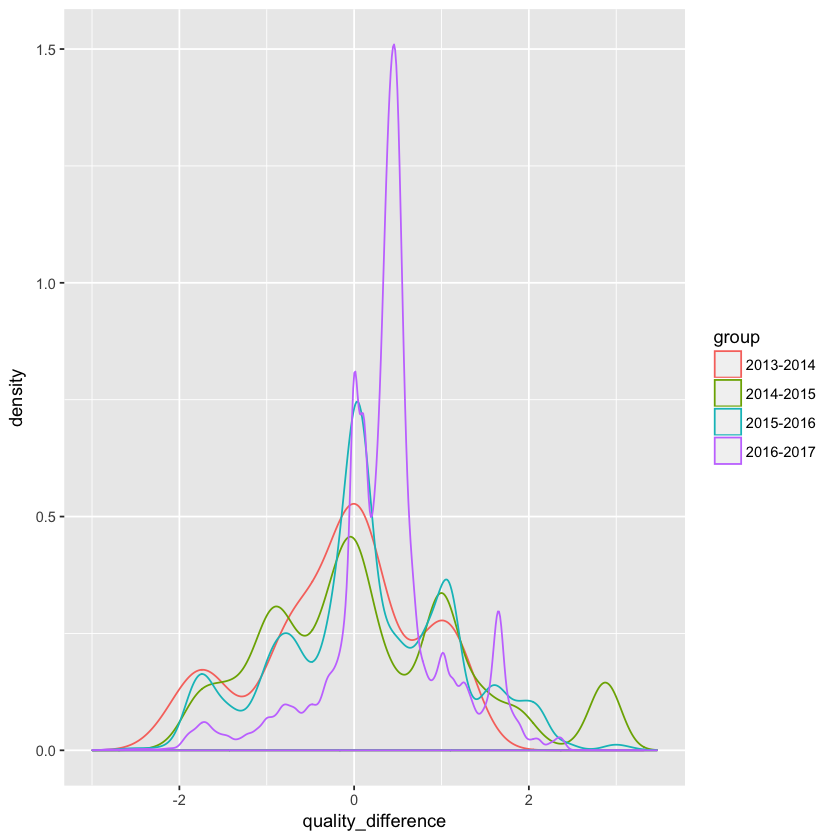

In [72]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

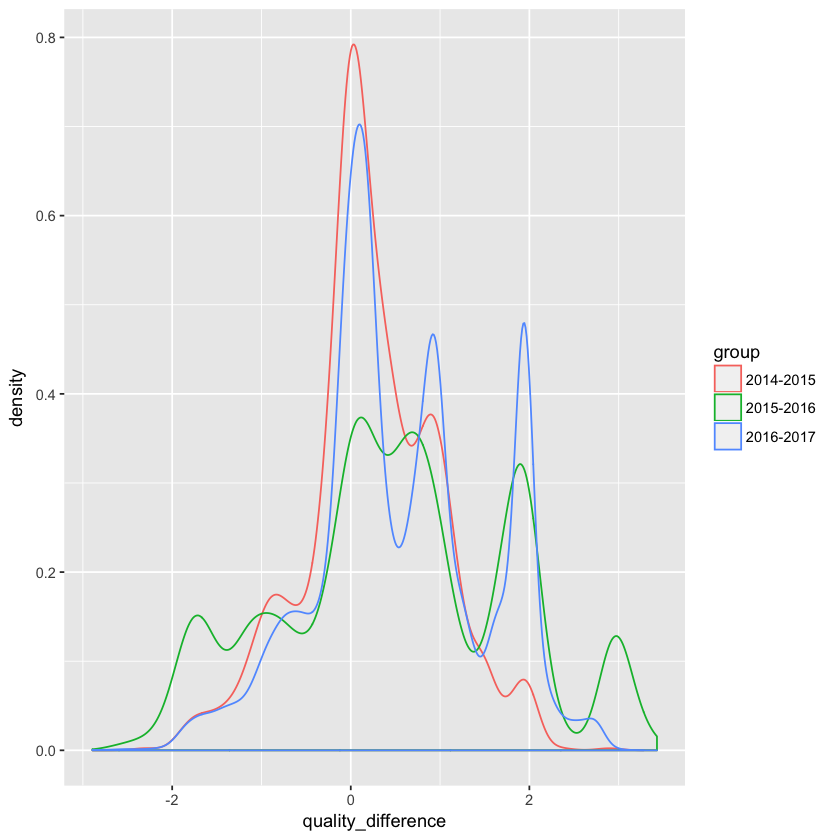

In [73]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

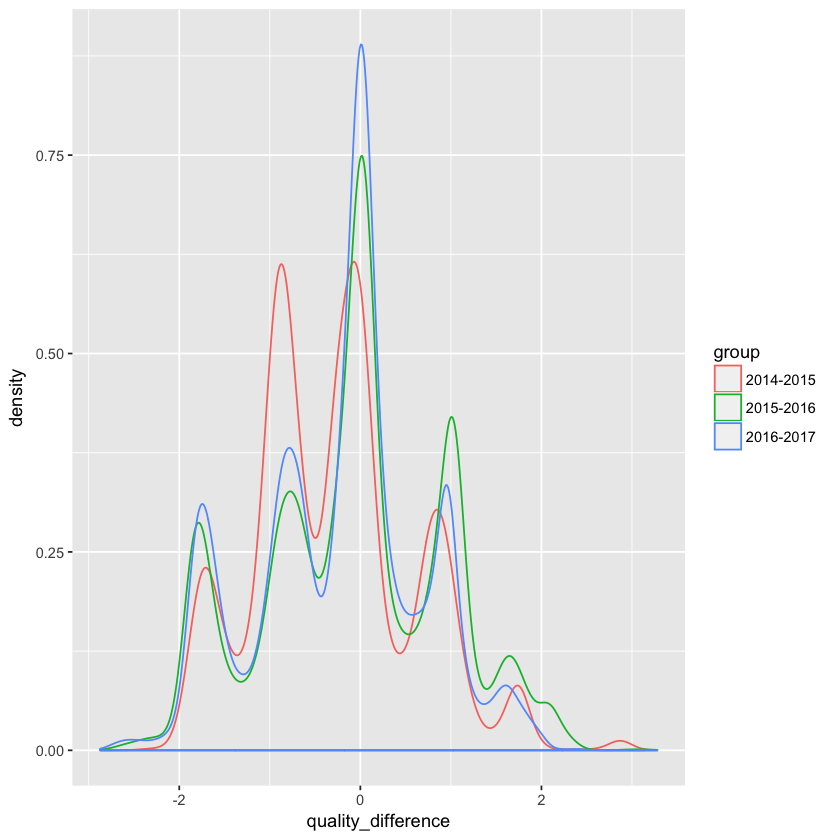

In [74]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

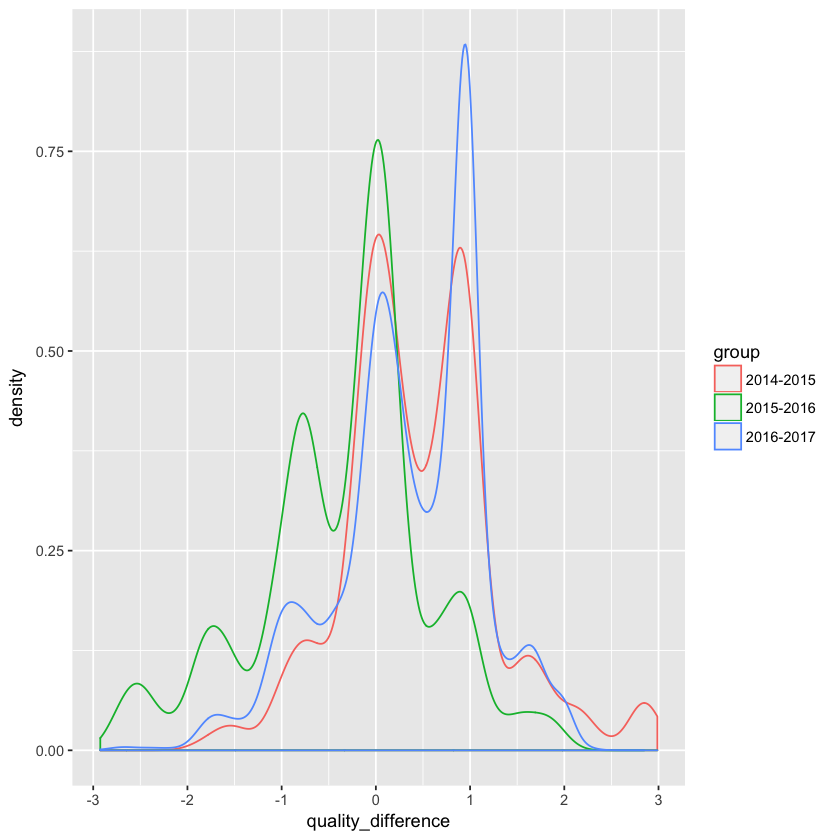

In [75]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

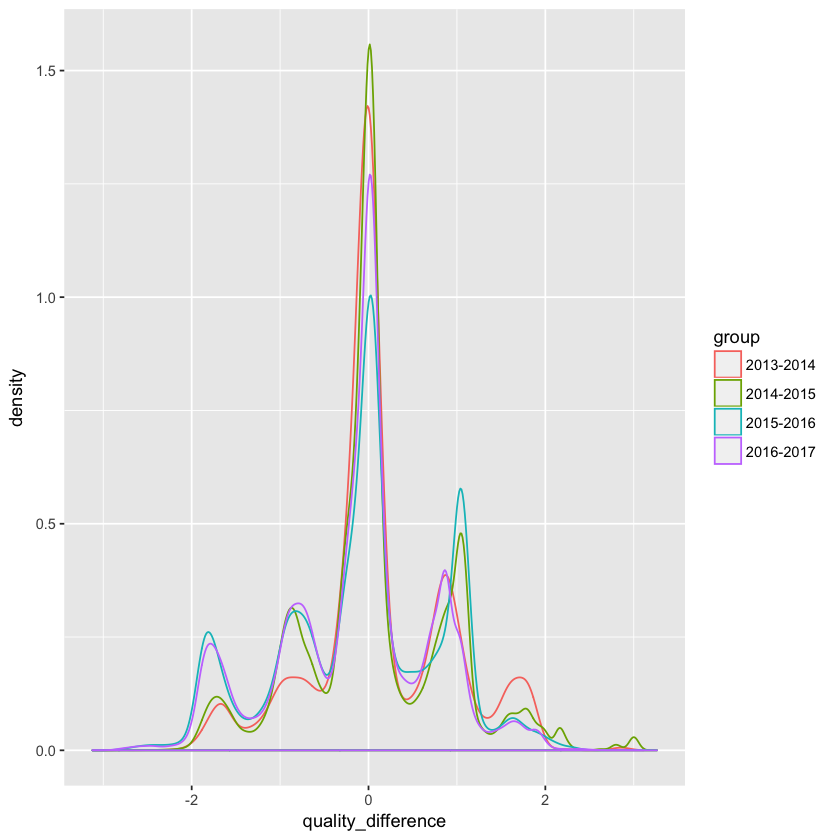

In [76]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

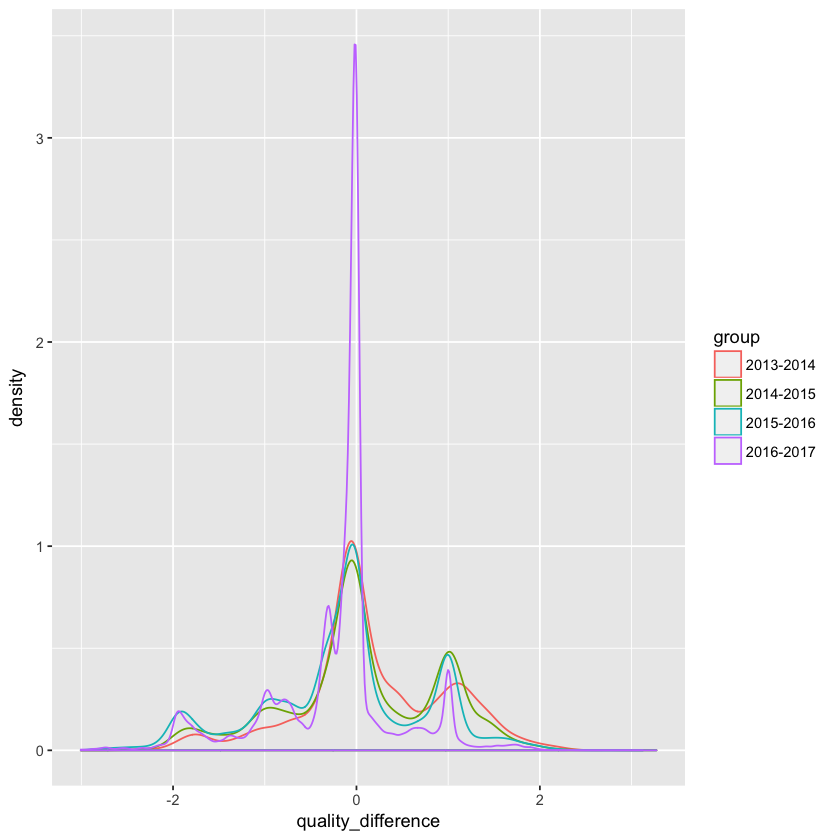

In [77]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

## Human edits

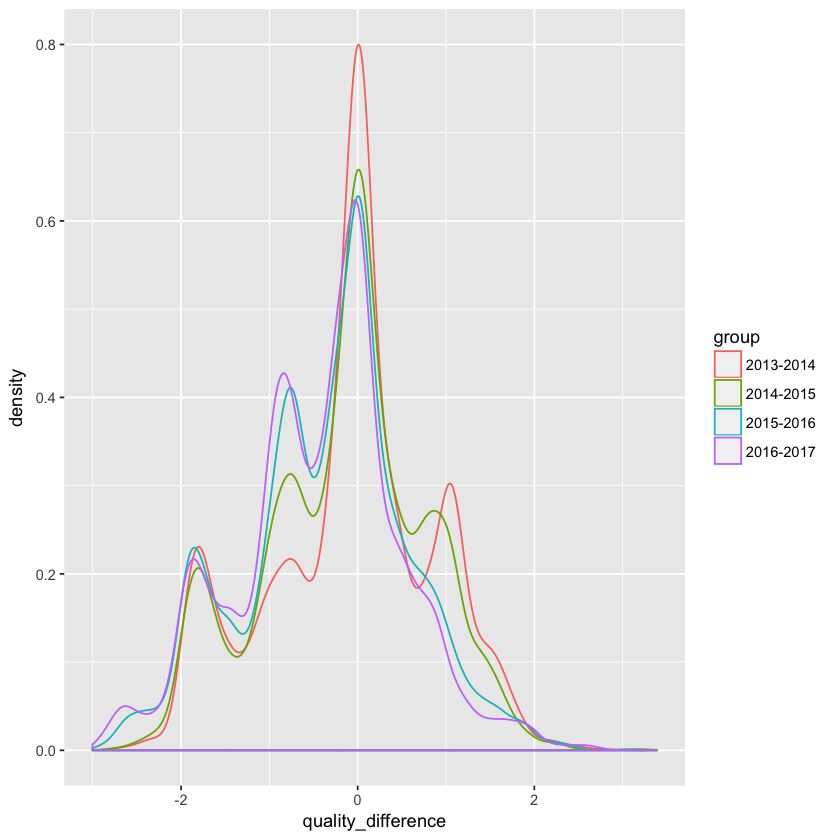

In [78]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

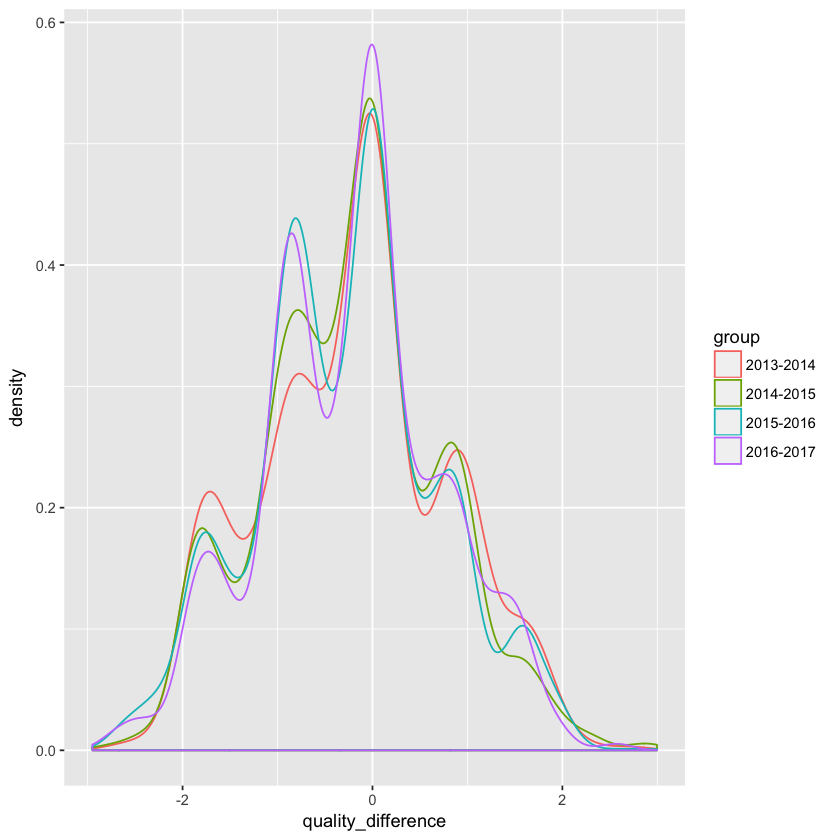

In [79]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

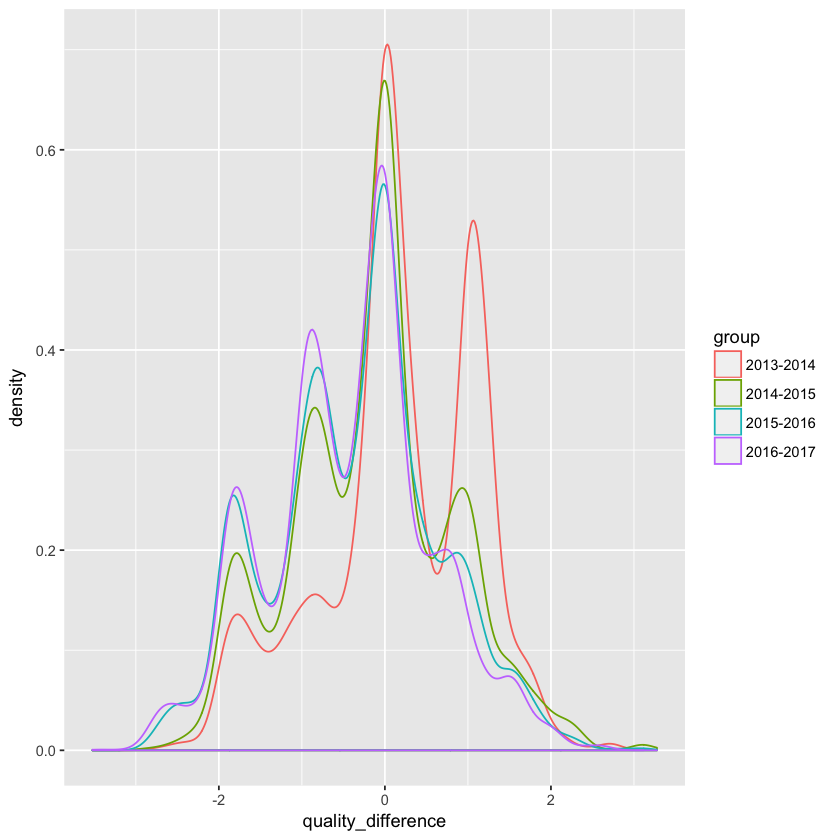

In [80]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

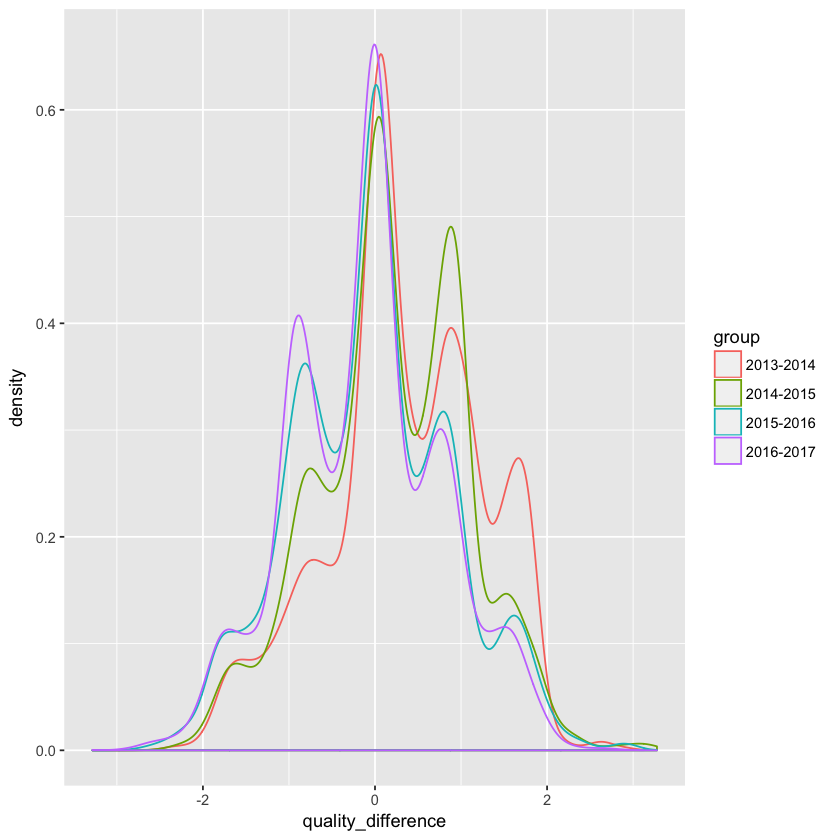

In [81]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

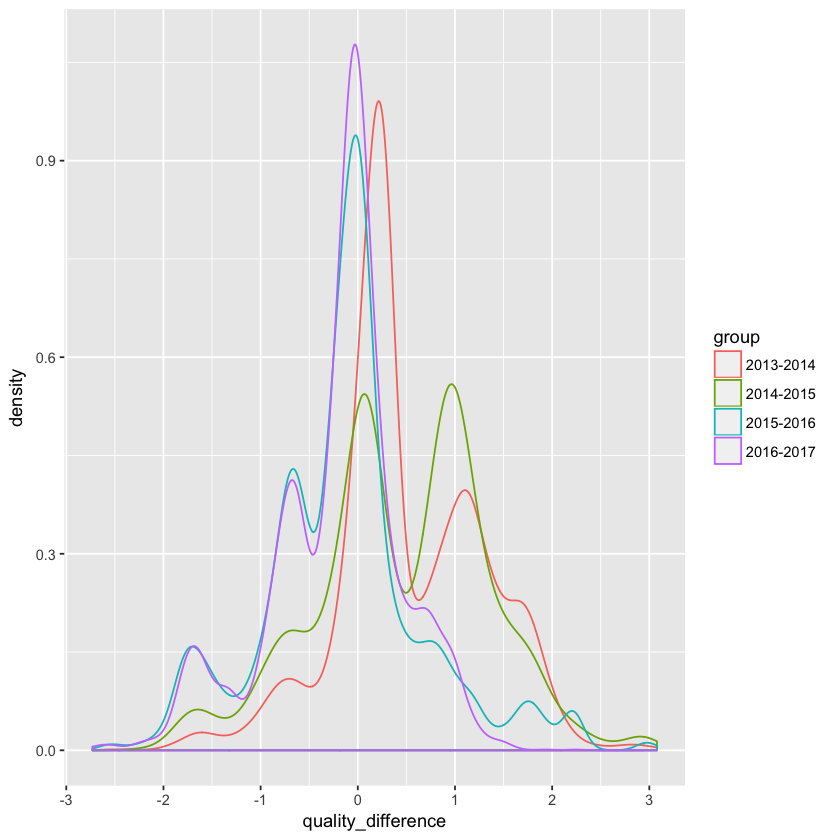

In [82]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

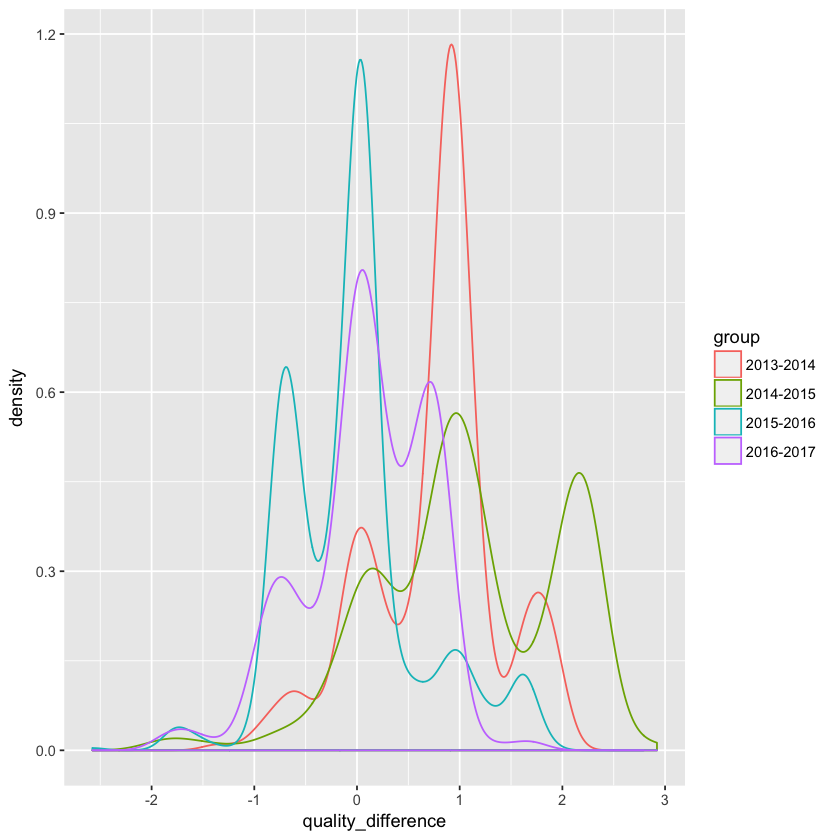

In [83]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

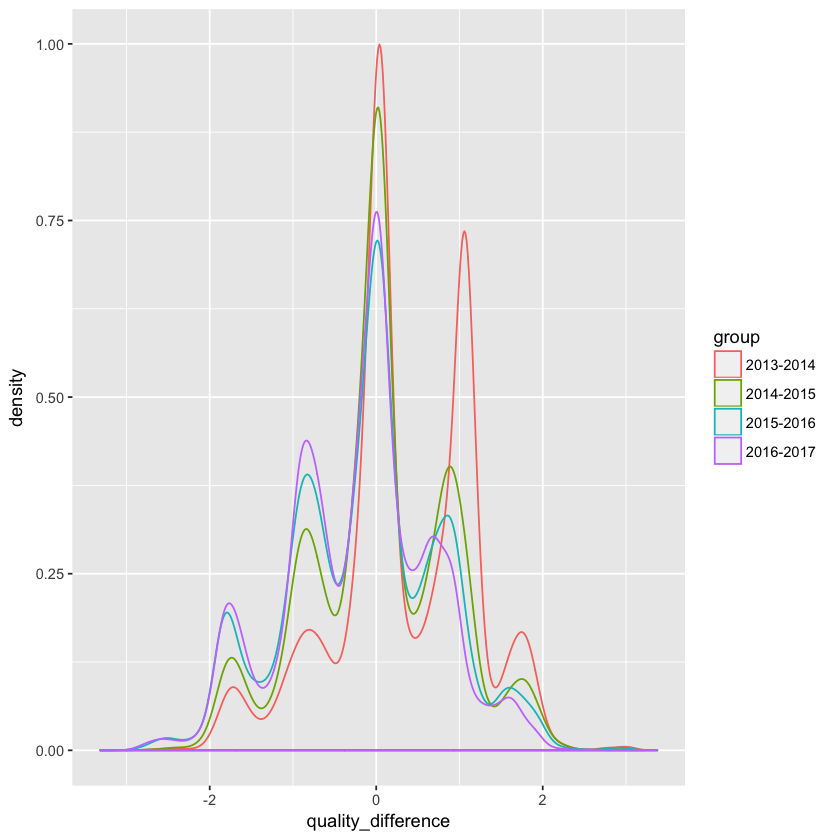

In [84]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

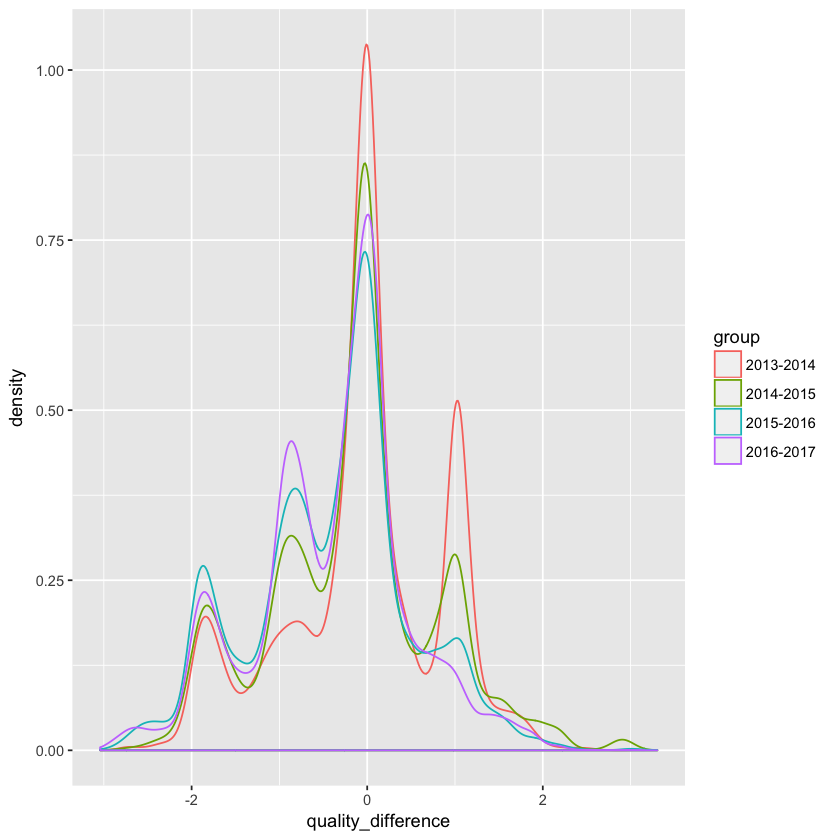

In [85]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

## Anon edits

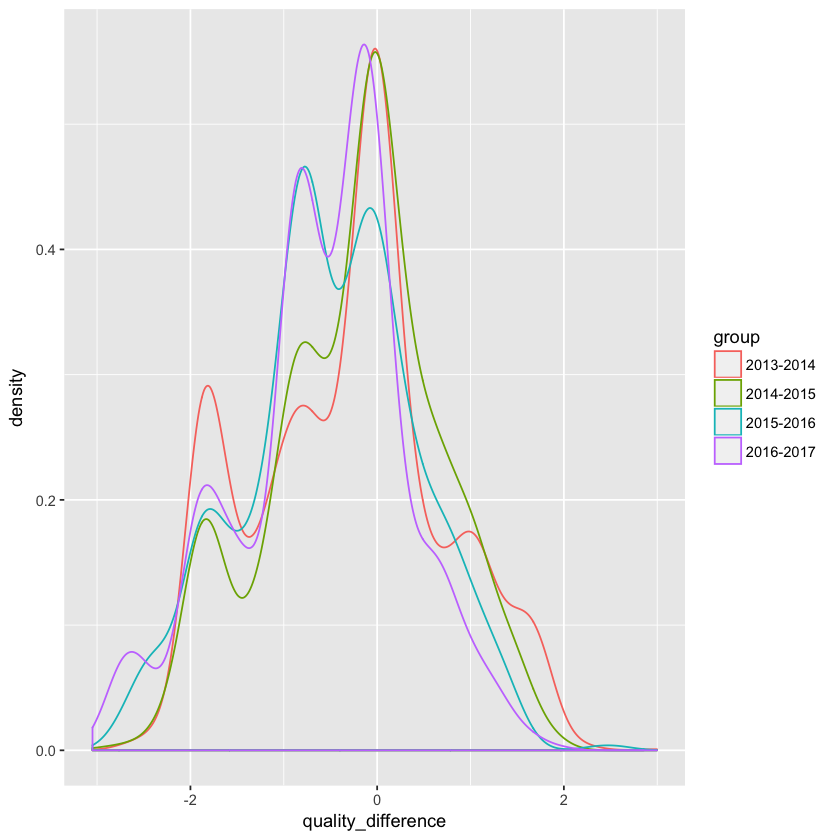

In [86]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

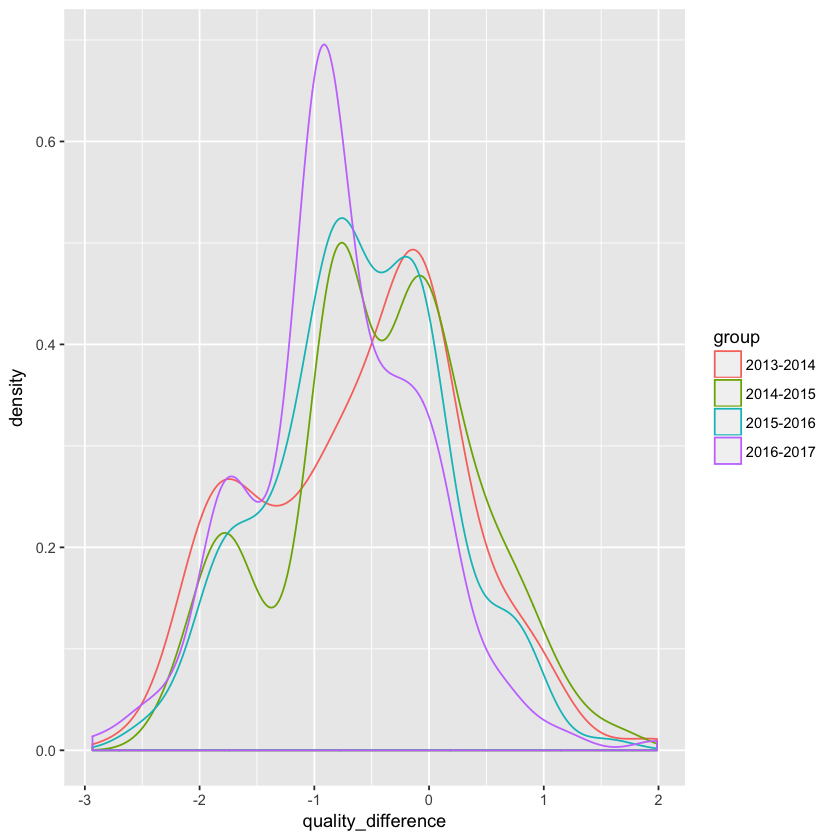

In [87]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

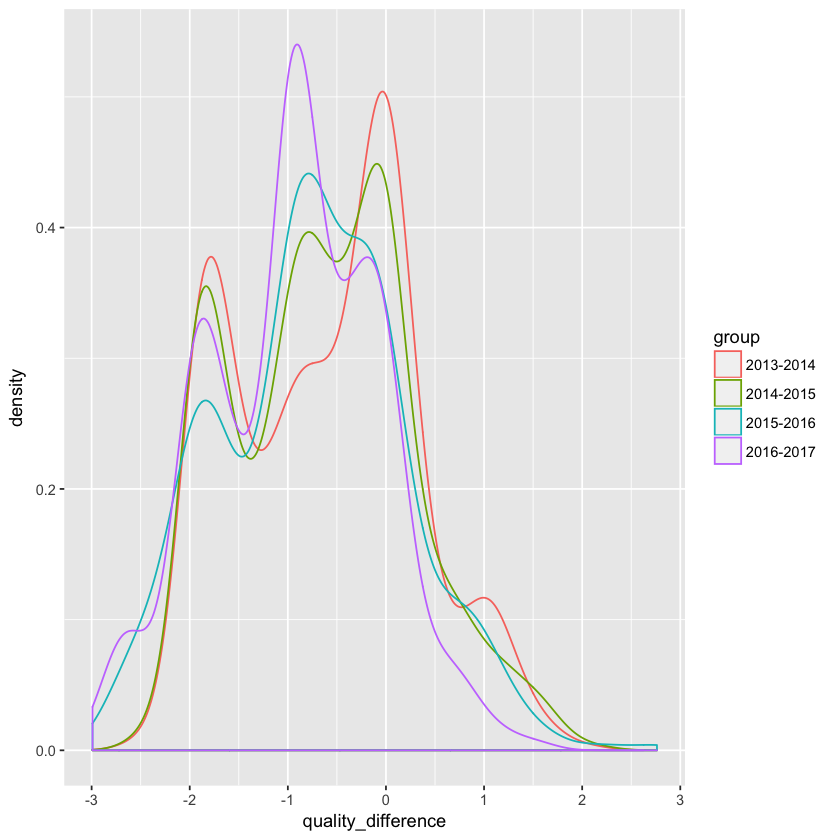

In [88]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

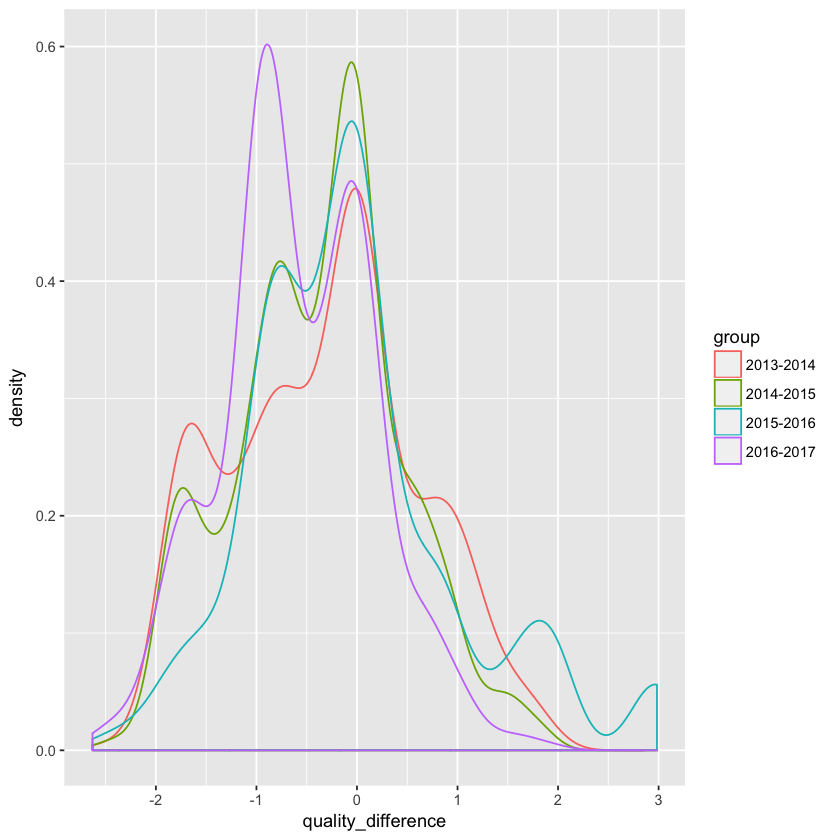

In [89]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

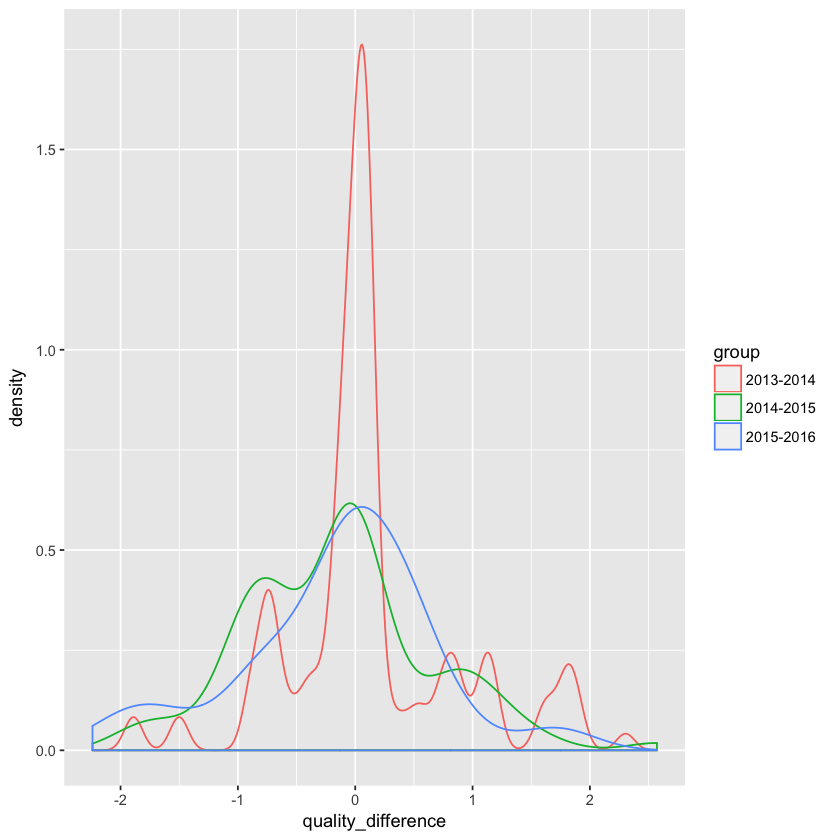

In [90]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

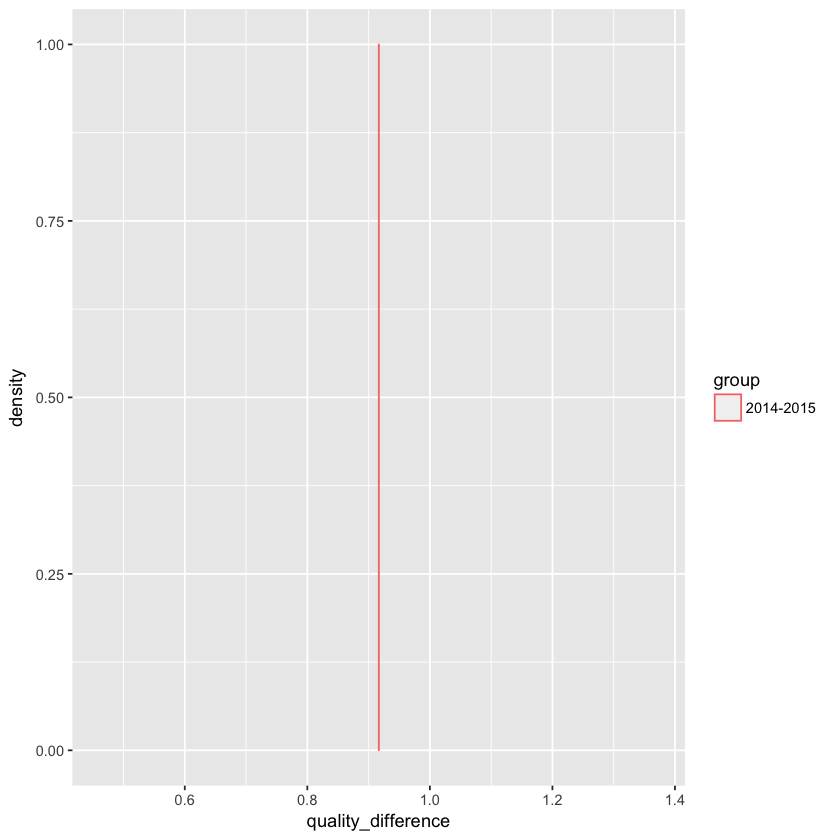

In [91]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

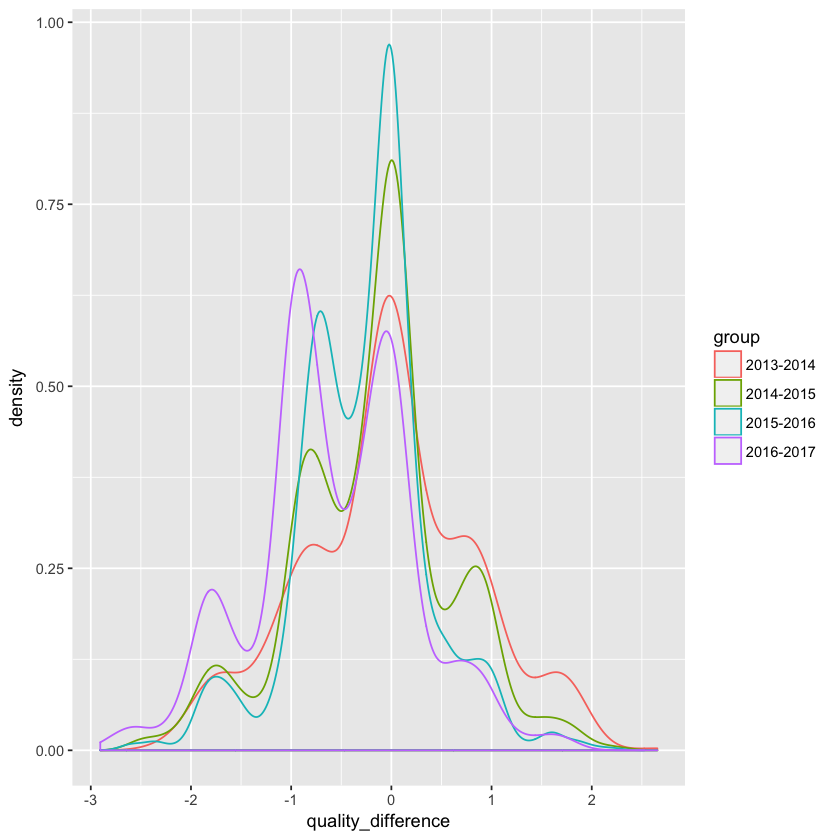

In [92]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

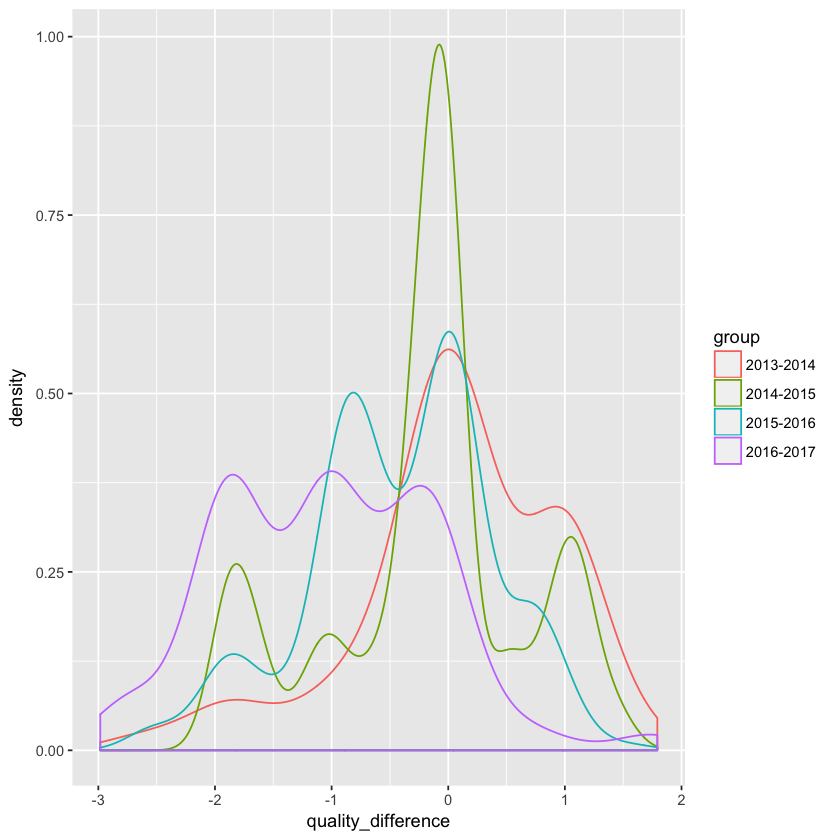

In [93]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',], 
       aes(x=quality_difference, color=group)) + geom_density()

In [94]:
# install.packages("viridis"
#                 )

In [95]:
library(viridis)

Loading required package: viridisLite


In [96]:
bot_claim_edits_2013_2014 = revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'bot_edit'
                                                                      ,]$quality_difference;
human_claim_edits_2013_2014 = revisions_weighted_sums_and_page_views_2013_2014[revisions_weighted_sums_and_page_views_2013_2014$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2013_2014$agent_type == 'human_edit'
                                                                      ,]$quality_difference;
length(bot_claim_edits_2013_2014)
length(human_claim_edits_2013_2014)


bot_claim_edits_2014_2015 = revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'bot_edit'
                                                                      ,]$quality_difference;
human_claim_edits_2014_2015 = revisions_weighted_sums_and_page_views_2014_2015[revisions_weighted_sums_and_page_views_2014_2015$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2014_2015$agent_type == 'human_edit'
                                                                      ,]$quality_difference;
length(bot_claim_edits_2014_2015)
length(human_claim_edits_2014_2015)

bot_claim_edits_2015_2016 = revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'bot_edit'
                                                                      ,]$quality_difference;
human_claim_edits_2015_2016 = revisions_weighted_sums_and_page_views_2015_2016[revisions_weighted_sums_and_page_views_2015_2016$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2015_2016$agent_type == 'human_edit'
                                                                      ,]$quality_difference;
length(bot_claim_edits_2015_2016)
length(human_claim_edits_2015_2016)

bot_claim_edits_2016_2017 = revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit'
                                                                      ,]$quality_difference;
human_claim_edits_2016_2017 = revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit'
                                                                      ,]$quality_difference;
length(bot_claim_edits_2016_2017)
length(human_claim_edits_2016_2017)

[1] 352315

[1] 34781

[1] 201687

[1] 29440

[1] 121300

[1] 35911

[1] 90262

[1] 56450

In [97]:
wilcox.test(bot_claim_edits_2013_2014, human_claim_edits_2013_2014, alternative = "two.sided")
wilcox.test(bot_claim_edits_2014_2015, human_claim_edits_2014_2015, alternative = "two.sided")
wilcox.test(bot_claim_edits_2015_2016, human_claim_edits_2015_2016, alternative = "two.sided")
wilcox.test(bot_claim_edits_2016_2017, human_claim_edits_2016_2017, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  bot_claim_edits_2013_2014 and human_claim_edits_2013_2014
W = 6888400000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  bot_claim_edits_2014_2015 and human_claim_edits_2014_2015
W = 4012500000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  bot_claim_edits_2015_2016 and human_claim_edits_2015_2016
W = 3067100000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  bot_claim_edits_2016_2017 and human_claim_edits_2016_2017
W = 3352200000, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [98]:
# Where on the expected quality scale are bots doing their work

page_view_quantile_increments_2016_2017 = quantile(revisions_weighted_sums_and_page_views_2016_2017$page_views, probs=seq(0,1,.05))

In [99]:
revisions_weighted_sums_and_page_views_2016_2017$group = 1
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[21],]$group = 1
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[20],]$group = .95
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[19],]$group = .9
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[18],]$group = .85
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[17],]$group = .8
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[16],]$group = .75
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[15],]$group = .7
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[14],]$group = .65
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[13],]$group = .6
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[12],]$group = .55
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[11],]$group = .5
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[10],]$group = .45
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[9],]$group = .4
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[8],]$group = .35
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[7],]$group = .3
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[6],]$group = .25
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[5],]$group = .2
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[4],]$group = .15
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[3],]$group = .1
revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$page_views < page_view_quantile_increments_2016_2017[2],]$group = .05

revisions_weighted_sums_and_page_views_2016_2017$group = factor(revisions_weighted_sums_and_page_views_2016_2017$group)



In [100]:
bot_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'bot_edit',]))
})

human_bot_like_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'human_bot_like_edit',]))
})

anon_bot_like_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'anon_bot_like_edit',]))
})

human_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'human_edit',]))
})

semi_automated_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'semi_automated_edit',]))
})

anon_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'anon_edit',]))
})

In [101]:

page_view_quantile = c(
              '0.05',
              '0.1',
              '0.15',
              '0.2', 
              '0.25', 
              '0.3', 
              '0.35', 
              '0.4', 
              '0.45', 
              '0.5', 
              '0.55', 
              '0.6', 
              '0.65', 
              '0.7', 
              '0.75', 
              '0.8', 
              '0.85', 
              '0.9', 
              '0.95', 
              '1')

bot_edit_proportion = c(
         bot_edit_proportion_by_quantile[['0.05']],
         bot_edit_proportion_by_quantile[['0.1']],
         bot_edit_proportion_by_quantile[['0.15']],
         bot_edit_proportion_by_quantile[['0.2']],
         bot_edit_proportion_by_quantile[['0.25']],
         bot_edit_proportion_by_quantile[['0.3']],
         bot_edit_proportion_by_quantile[['0.35']],
         bot_edit_proportion_by_quantile[['0.4']],
         bot_edit_proportion_by_quantile[['0.45']],
         bot_edit_proportion_by_quantile[['0.5']],
         bot_edit_proportion_by_quantile[['0.55']],
         bot_edit_proportion_by_quantile[['0.6']],
         bot_edit_proportion_by_quantile[['0.65']],
         bot_edit_proportion_by_quantile[['0.7']],
         bot_edit_proportion_by_quantile[['0.75']],
         bot_edit_proportion_by_quantile[['0.8']],
         bot_edit_proportion_by_quantile[['0.85']],
         bot_edit_proportion_by_quantile[['0.9']],
         bot_edit_proportion_by_quantile[['0.95']],
         bot_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_bot_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_bot_edit_proportions$proportion = bot_edit_proportion
page_view_quantiles_and_bot_edit_proportions$group = "bot"

human_bot_like_edit_proportion = c(
         human_bot_like_edit_proportion_by_quantile[['0.05']],
         human_bot_like_edit_proportion_by_quantile[['0.1']],
         human_bot_like_edit_proportion_by_quantile[['0.15']],
         human_bot_like_edit_proportion_by_quantile[['0.2']],
         human_bot_like_edit_proportion_by_quantile[['0.25']],
         human_bot_like_edit_proportion_by_quantile[['0.3']],
         human_bot_like_edit_proportion_by_quantile[['0.35']],
         human_bot_like_edit_proportion_by_quantile[['0.4']],
         human_bot_like_edit_proportion_by_quantile[['0.45']],
         human_bot_like_edit_proportion_by_quantile[['0.5']],
         human_bot_like_edit_proportion_by_quantile[['0.55']],
         human_bot_like_edit_proportion_by_quantile[['0.6']],
         human_bot_like_edit_proportion_by_quantile[['0.65']],
         human_bot_like_edit_proportion_by_quantile[['0.7']],
         human_bot_like_edit_proportion_by_quantile[['0.75']],
         human_bot_like_edit_proportion_by_quantile[['0.8']],
         human_bot_like_edit_proportion_by_quantile[['0.85']],
         human_bot_like_edit_proportion_by_quantile[['0.9']],
         human_bot_like_edit_proportion_by_quantile[['0.95']],
         human_bot_like_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_human_bot_like_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_human_bot_like_edit_proportions$proportion = human_bot_like_edit_proportion
page_view_quantiles_and_human_bot_like_edit_proportions$group = "human_bot_like"

anon_bot_like_edit_proportion = c(
         anon_bot_like_edit_proportion_by_quantile[['0.05']],
         anon_bot_like_edit_proportion_by_quantile[['0.1']],
         anon_bot_like_edit_proportion_by_quantile[['0.15']],
         anon_bot_like_edit_proportion_by_quantile[['0.2']],
         anon_bot_like_edit_proportion_by_quantile[['0.25']],
         anon_bot_like_edit_proportion_by_quantile[['0.3']],
         anon_bot_like_edit_proportion_by_quantile[['0.35']],
         anon_bot_like_edit_proportion_by_quantile[['0.4']],
         anon_bot_like_edit_proportion_by_quantile[['0.45']],
         anon_bot_like_edit_proportion_by_quantile[['0.5']],
         anon_bot_like_edit_proportion_by_quantile[['0.55']],
         anon_bot_like_edit_proportion_by_quantile[['0.6']],
         anon_bot_like_edit_proportion_by_quantile[['0.65']],
         anon_bot_like_edit_proportion_by_quantile[['0.7']],
         anon_bot_like_edit_proportion_by_quantile[['0.75']],
         anon_bot_like_edit_proportion_by_quantile[['0.8']],
         anon_bot_like_edit_proportion_by_quantile[['0.85']],
         anon_bot_like_edit_proportion_by_quantile[['0.9']],
         anon_bot_like_edit_proportion_by_quantile[['0.95']],
         anon_bot_like_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_anon_bot_like_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_anon_bot_like_edit_proportions$proportion = anon_bot_like_edit_proportion
page_view_quantiles_and_anon_bot_like_edit_proportions$group = "anon_bot_like"

human_edit_proportion = c(  
         human_edit_proportion_by_quantile[['0.05']],
         human_edit_proportion_by_quantile[['0.1']],
         human_edit_proportion_by_quantile[['0.15']],
         human_edit_proportion_by_quantile[['0.2']],
         human_edit_proportion_by_quantile[['0.25']],
         human_edit_proportion_by_quantile[['0.3']],
         human_edit_proportion_by_quantile[['0.35']],
         human_edit_proportion_by_quantile[['0.4']],
         human_edit_proportion_by_quantile[['0.45']],
         human_edit_proportion_by_quantile[['0.5']],
         human_edit_proportion_by_quantile[['0.55']],
         human_edit_proportion_by_quantile[['0.6']],
         human_edit_proportion_by_quantile[['0.65']],
         human_edit_proportion_by_quantile[['0.7']],
         human_edit_proportion_by_quantile[['0.75']],
         human_edit_proportion_by_quantile[['0.8']],
         human_edit_proportion_by_quantile[['0.85']],
         human_edit_proportion_by_quantile[['0.9']],
         human_edit_proportion_by_quantile[['0.95']],
         human_edit_proportion_by_quantile[['1']])

page_view_quantiles_and_human_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_human_edit_proportions$proportion = human_edit_proportion
page_view_quantiles_and_human_edit_proportions$group = "human"

semi_automated_edit_proportion = c(  
         semi_automated_edit_proportion_by_quantile[['0.05']],
         semi_automated_edit_proportion_by_quantile[['0.1']],
         semi_automated_edit_proportion_by_quantile[['0.15']],
         semi_automated_edit_proportion_by_quantile[['0.2']],
         semi_automated_edit_proportion_by_quantile[['0.25']],
         semi_automated_edit_proportion_by_quantile[['0.3']],
         semi_automated_edit_proportion_by_quantile[['0.35']],
         semi_automated_edit_proportion_by_quantile[['0.4']],
         semi_automated_edit_proportion_by_quantile[['0.45']],
         semi_automated_edit_proportion_by_quantile[['0.5']],
         semi_automated_edit_proportion_by_quantile[['0.55']],
         semi_automated_edit_proportion_by_quantile[['0.6']],
         semi_automated_edit_proportion_by_quantile[['0.65']],
         semi_automated_edit_proportion_by_quantile[['0.7']],
         semi_automated_edit_proportion_by_quantile[['0.75']],
         semi_automated_edit_proportion_by_quantile[['0.8']],
         semi_automated_edit_proportion_by_quantile[['0.85']],
         semi_automated_edit_proportion_by_quantile[['0.9']],
         semi_automated_edit_proportion_by_quantile[['0.95']],
         semi_automated_edit_proportion_by_quantile[['1']])

page_view_quantiles_and_semi_automated_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_semi_automated_edit_proportions$proportion = semi_automated_edit_proportion
page_view_quantiles_and_semi_automated_edit_proportions$group = "semi_automated"

anon_edit_proportion = c(  
         anon_edit_proportion_by_quantile[['0.05']],
         anon_edit_proportion_by_quantile[['0.1']],
         anon_edit_proportion_by_quantile[['0.15']],
         anon_edit_proportion_by_quantile[['0.2']],
         anon_edit_proportion_by_quantile[['0.25']],
         anon_edit_proportion_by_quantile[['0.3']],
         anon_edit_proportion_by_quantile[['0.35']],
         anon_edit_proportion_by_quantile[['0.4']],
         anon_edit_proportion_by_quantile[['0.45']],
         anon_edit_proportion_by_quantile[['0.5']],
         anon_edit_proportion_by_quantile[['0.55']],
         anon_edit_proportion_by_quantile[['0.6']],
         anon_edit_proportion_by_quantile[['0.65']],
         anon_edit_proportion_by_quantile[['0.7']],
         anon_edit_proportion_by_quantile[['0.75']],
         anon_edit_proportion_by_quantile[['0.8']],
         anon_edit_proportion_by_quantile[['0.85']],
         anon_edit_proportion_by_quantile[['0.9']],
         anon_edit_proportion_by_quantile[['0.95']],
         anon_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_anon_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_anon_edit_proportions$proportion = anon_edit_proportion
page_view_quantiles_and_anon_edit_proportions$group = "anon"


page_view_quantiles_and_proportions = rbind(rbind(rbind(rbind(rbind(
    page_view_quantiles_and_bot_edit_proportions,
    page_view_quantiles_and_human_bot_like_edit_proportions),
    page_view_quantiles_and_human_edit_proportions),
    page_view_quantiles_and_semi_automated_edit_proportions),
    page_view_quantiles_and_anon_edit_proportions),
    page_view_quantiles_and_anon_bot_like_edit_proportions)
    
                                            
#                                             ),
                                                  
head(page_view_quantiles_and_proportions)

page_view_quantile proportion group
1 0.05               26935      bot  
2 0.1                40595      bot  
3 0.15               28753      bot  
4 0.2                40647      bot  
5 0.25               40037      bot  
6 0.3                34625      bot

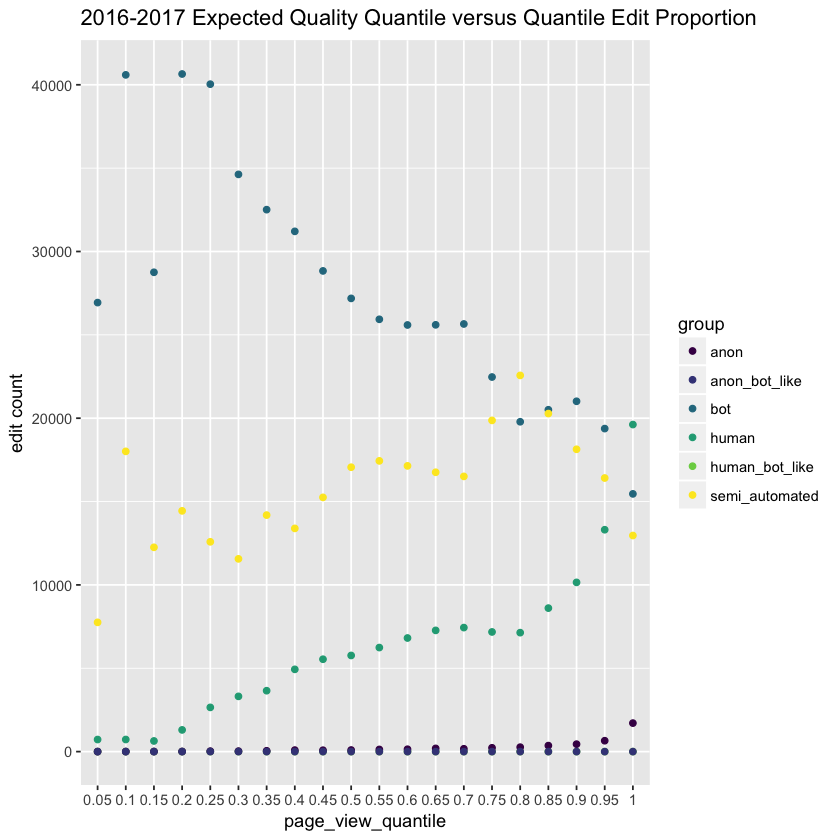

In [102]:
ggplot(page_view_quantiles_and_proportions,
       aes(x=page_view_quantile, y=proportion, color=group, linetype=group)) + geom_point() + 
ggtitle("2016-2017 Expected Quality Quantile versus Quantile Edit Proportion") +
scale_color_viridis(discrete=TRUE) + labs(y = "edit count")

In [103]:

 

ggplot(revisions_weighted_sums_and_page_views_2016_2017,
       aes(x=expected_quality_quantile, color=agent_type, linetype=agent_type)) + geom_density() + 
ggtitle("2016-2017 Expected Quality Quantile versus Quantile Edit Proportion") +
scale_color_viridis(discrete=TRUE)

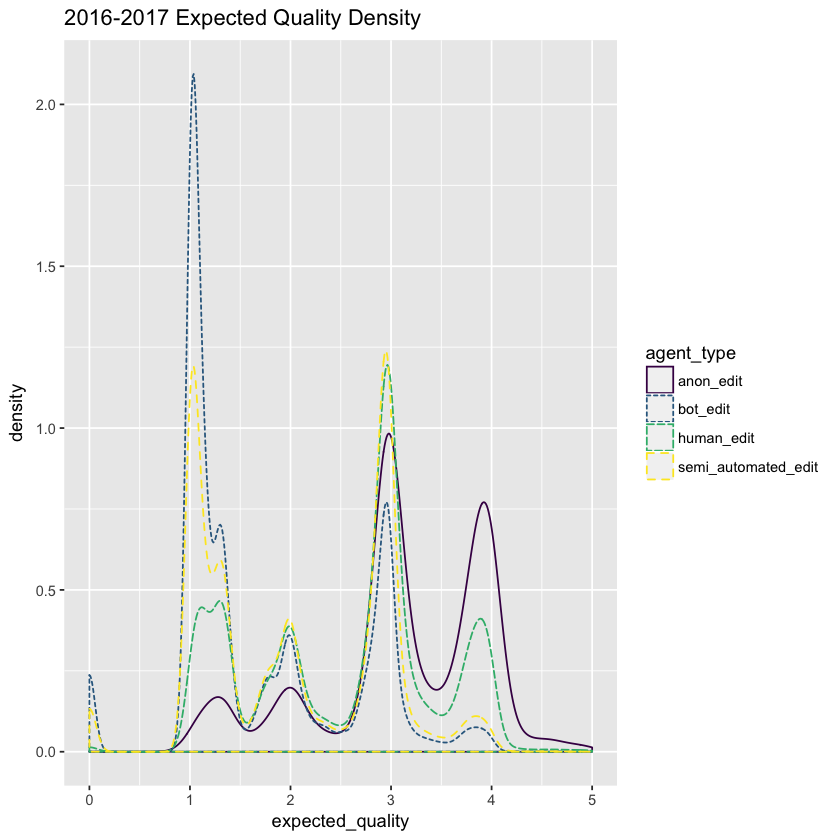

In [104]:
ggplot(revisions_weighted_sums_and_page_views_2016_2017,
       aes(expected_quality, color=agent_type, linetype=agent_type)) + geom_density() + ggtitle("2016-2017 Expected Quality Density") +
scale_color_viridis(discrete=TRUE)

In [105]:
bot_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'bot_edit',])/nrow(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'bot_edit',]))
})

human_bot_like_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'human_bot_like_edit',])/nrow(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_bot_like_edit',]))
})

anon_bot_like_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'anon_bot_like_edit',])/nrow(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_bot_like_edit',]))
})

human_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'human_edit',])/nrow(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'human_edit',]))
})

semi_automated_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'semi_automated_edit',])/nrow(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'semi_automated_edit',]))
})

anon_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views[quality_and_page_views$agent_type == 'anon_edit',])/nrow(revisions_weighted_sums_and_page_views_2016_2017[revisions_weighted_sums_and_page_views_2016_2017$agent_type == 'anon_edit',]))
})

In [106]:

page_view_quantile = c(
              '0.05',
              '0.1',
              '0.15',
              '0.2', 
              '0.25', 
              '0.3', 
              '0.35', 
              '0.4', 
              '0.45', 
              '0.5', 
              '0.55', 
              '0.6', 
              '0.65', 
              '0.7', 
              '0.75', 
              '0.8', 
              '0.85', 
              '0.9', 
              '0.95', 
              '1')

bot_edit_proportion = c(
         bot_edit_proportion_by_quantile[['0.05']],
         bot_edit_proportion_by_quantile[['0.1']],
         bot_edit_proportion_by_quantile[['0.15']],
         bot_edit_proportion_by_quantile[['0.2']],
         bot_edit_proportion_by_quantile[['0.25']],
         bot_edit_proportion_by_quantile[['0.3']],
         bot_edit_proportion_by_quantile[['0.35']],
         bot_edit_proportion_by_quantile[['0.4']],
         bot_edit_proportion_by_quantile[['0.45']],
         bot_edit_proportion_by_quantile[['0.5']],
         bot_edit_proportion_by_quantile[['0.55']],
         bot_edit_proportion_by_quantile[['0.6']],
         bot_edit_proportion_by_quantile[['0.65']],
         bot_edit_proportion_by_quantile[['0.7']],
         bot_edit_proportion_by_quantile[['0.75']],
         bot_edit_proportion_by_quantile[['0.8']],
         bot_edit_proportion_by_quantile[['0.85']],
         bot_edit_proportion_by_quantile[['0.9']],
         bot_edit_proportion_by_quantile[['0.95']],
         bot_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_bot_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_bot_edit_proportions$proportion = bot_edit_proportion
page_view_quantiles_and_bot_edit_proportions$group = "bot"

human_bot_like_edit_proportion = c(
         human_bot_like_edit_proportion_by_quantile[['0.05']],
         human_bot_like_edit_proportion_by_quantile[['0.1']],
         human_bot_like_edit_proportion_by_quantile[['0.15']],
         human_bot_like_edit_proportion_by_quantile[['0.2']],
         human_bot_like_edit_proportion_by_quantile[['0.25']],
         human_bot_like_edit_proportion_by_quantile[['0.3']],
         human_bot_like_edit_proportion_by_quantile[['0.35']],
         human_bot_like_edit_proportion_by_quantile[['0.4']],
         human_bot_like_edit_proportion_by_quantile[['0.45']],
         human_bot_like_edit_proportion_by_quantile[['0.5']],
         human_bot_like_edit_proportion_by_quantile[['0.55']],
         human_bot_like_edit_proportion_by_quantile[['0.6']],
         human_bot_like_edit_proportion_by_quantile[['0.65']],
         human_bot_like_edit_proportion_by_quantile[['0.7']],
         human_bot_like_edit_proportion_by_quantile[['0.75']],
         human_bot_like_edit_proportion_by_quantile[['0.8']],
         human_bot_like_edit_proportion_by_quantile[['0.85']],
         human_bot_like_edit_proportion_by_quantile[['0.9']],
         human_bot_like_edit_proportion_by_quantile[['0.95']],
         human_bot_like_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_human_bot_like_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_human_bot_like_edit_proportions$proportion = human_bot_like_edit_proportion
page_view_quantiles_and_human_bot_like_edit_proportions$group = "human_bot_like"

anon_bot_like_edit_proportion = c(
         anon_bot_like_edit_proportion_by_quantile[['0.05']],
         anon_bot_like_edit_proportion_by_quantile[['0.1']],
         anon_bot_like_edit_proportion_by_quantile[['0.15']],
         anon_bot_like_edit_proportion_by_quantile[['0.2']],
         anon_bot_like_edit_proportion_by_quantile[['0.25']],
         anon_bot_like_edit_proportion_by_quantile[['0.3']],
         anon_bot_like_edit_proportion_by_quantile[['0.35']],
         anon_bot_like_edit_proportion_by_quantile[['0.4']],
         anon_bot_like_edit_proportion_by_quantile[['0.45']],
         anon_bot_like_edit_proportion_by_quantile[['0.5']],
         anon_bot_like_edit_proportion_by_quantile[['0.55']],
         anon_bot_like_edit_proportion_by_quantile[['0.6']],
         anon_bot_like_edit_proportion_by_quantile[['0.65']],
         anon_bot_like_edit_proportion_by_quantile[['0.7']],
         anon_bot_like_edit_proportion_by_quantile[['0.75']],
         anon_bot_like_edit_proportion_by_quantile[['0.8']],
         anon_bot_like_edit_proportion_by_quantile[['0.85']],
         anon_bot_like_edit_proportion_by_quantile[['0.9']],
         anon_bot_like_edit_proportion_by_quantile[['0.95']],
         anon_bot_like_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_anon_bot_like_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_anon_bot_like_edit_proportions$proportion = anon_bot_like_edit_proportion
page_view_quantiles_and_anon_bot_like_edit_proportions$group = "anon_bot_like"

human_edit_proportion = c(  
         human_edit_proportion_by_quantile[['0.05']],
         human_edit_proportion_by_quantile[['0.1']],
         human_edit_proportion_by_quantile[['0.15']],
         human_edit_proportion_by_quantile[['0.2']],
         human_edit_proportion_by_quantile[['0.25']],
         human_edit_proportion_by_quantile[['0.3']],
         human_edit_proportion_by_quantile[['0.35']],
         human_edit_proportion_by_quantile[['0.4']],
         human_edit_proportion_by_quantile[['0.45']],
         human_edit_proportion_by_quantile[['0.5']],
         human_edit_proportion_by_quantile[['0.55']],
         human_edit_proportion_by_quantile[['0.6']],
         human_edit_proportion_by_quantile[['0.65']],
         human_edit_proportion_by_quantile[['0.7']],
         human_edit_proportion_by_quantile[['0.75']],
         human_edit_proportion_by_quantile[['0.8']],
         human_edit_proportion_by_quantile[['0.85']],
         human_edit_proportion_by_quantile[['0.9']],
         human_edit_proportion_by_quantile[['0.95']],
         human_edit_proportion_by_quantile[['1']])

page_view_quantiles_and_human_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_human_edit_proportions$proportion = human_edit_proportion
page_view_quantiles_and_human_edit_proportions$group = "human"

semi_automated_edit_proportion = c(  
         semi_automated_edit_proportion_by_quantile[['0.05']],
         semi_automated_edit_proportion_by_quantile[['0.1']],
         semi_automated_edit_proportion_by_quantile[['0.15']],
         semi_automated_edit_proportion_by_quantile[['0.2']],
         semi_automated_edit_proportion_by_quantile[['0.25']],
         semi_automated_edit_proportion_by_quantile[['0.3']],
         semi_automated_edit_proportion_by_quantile[['0.35']],
         semi_automated_edit_proportion_by_quantile[['0.4']],
         semi_automated_edit_proportion_by_quantile[['0.45']],
         semi_automated_edit_proportion_by_quantile[['0.5']],
         semi_automated_edit_proportion_by_quantile[['0.55']],
         semi_automated_edit_proportion_by_quantile[['0.6']],
         semi_automated_edit_proportion_by_quantile[['0.65']],
         semi_automated_edit_proportion_by_quantile[['0.7']],
         semi_automated_edit_proportion_by_quantile[['0.75']],
         semi_automated_edit_proportion_by_quantile[['0.8']],
         semi_automated_edit_proportion_by_quantile[['0.85']],
         semi_automated_edit_proportion_by_quantile[['0.9']],
         semi_automated_edit_proportion_by_quantile[['0.95']],
         semi_automated_edit_proportion_by_quantile[['1']])

page_view_quantiles_and_semi_automated_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_semi_automated_edit_proportions$proportion = semi_automated_edit_proportion
page_view_quantiles_and_semi_automated_edit_proportions$group = "semi_automated"

anon_edit_proportion = c(  
         anon_edit_proportion_by_quantile[['0.05']],
         anon_edit_proportion_by_quantile[['0.1']],
         anon_edit_proportion_by_quantile[['0.15']],
         anon_edit_proportion_by_quantile[['0.2']],
         anon_edit_proportion_by_quantile[['0.25']],
         anon_edit_proportion_by_quantile[['0.3']],
         anon_edit_proportion_by_quantile[['0.35']],
         anon_edit_proportion_by_quantile[['0.4']],
         anon_edit_proportion_by_quantile[['0.45']],
         anon_edit_proportion_by_quantile[['0.5']],
         anon_edit_proportion_by_quantile[['0.55']],
         anon_edit_proportion_by_quantile[['0.6']],
         anon_edit_proportion_by_quantile[['0.65']],
         anon_edit_proportion_by_quantile[['0.7']],
         anon_edit_proportion_by_quantile[['0.75']],
         anon_edit_proportion_by_quantile[['0.8']],
         anon_edit_proportion_by_quantile[['0.85']],
         anon_edit_proportion_by_quantile[['0.9']],
         anon_edit_proportion_by_quantile[['0.95']],
         anon_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_anon_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_anon_edit_proportions$proportion = anon_edit_proportion
page_view_quantiles_and_anon_edit_proportions$group = "anon"


page_view_quantiles_and_proportions = rbind(rbind(rbind(rbind(
    page_view_quantiles_and_bot_edit_proportions,
    page_view_quantiles_and_human_bot_like_edit_proportions),
    page_view_quantiles_and_human_edit_proportions),
    page_view_quantiles_and_semi_automated_edit_proportions),
    page_view_quantiles_and_anon_edit_proportions)

#                                             page_view_quantiles_and_anon_bot_like_edit_proportions),

Warning message:
“Removed 20 rows containing missing values (geom_point).”

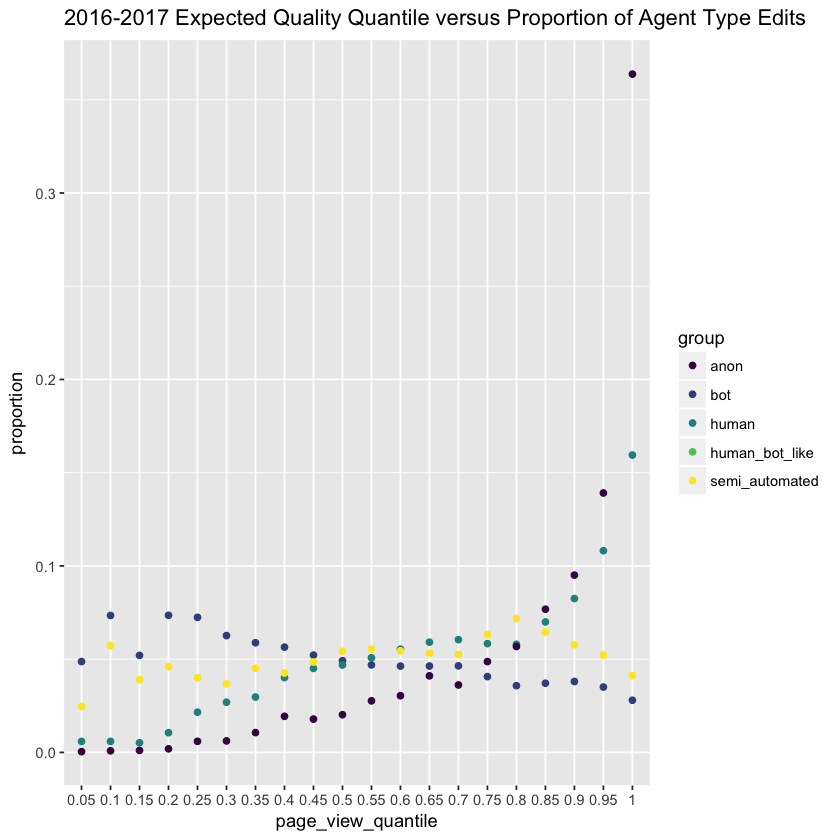

In [107]:
ggplot(page_view_quantiles_and_proportions,
       aes(x=page_view_quantile, y=proportion, color=group, linetype=group)) + geom_point() + 
ggtitle("2016-2017 Expected Quality Quantile versus Proportion of Agent Type Edits") +
scale_color_viridis(discrete=TRUE)

 

In [108]:
bot_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(mean(quality_and_page_views[quality_and_page_views$agent_type == 'bot_edit',]$quality_difference))
})

human_bot_like_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(mean(quality_and_page_views[quality_and_page_views$agent_type == 'human_bot_like_edit',]$quality_difference))
})

anon_bot_like_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(mean(quality_and_page_views[quality_and_page_views$agent_type == 'anon_bot_like_edit',]$quality_difference))
})

human_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(mean(quality_and_page_views[quality_and_page_views$agent_type == 'human_edit',]$quality_difference))
})

semi_automated_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(mean(quality_and_page_views[quality_and_page_views$agent_type == 'semi_automated_edit',]$quality_difference))
})

anon_edit_proportion_by_quantile =  by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(mean(quality_and_page_views[quality_and_page_views$agent_type == 'anon_edit',]$quality_difference))
})

In [109]:

page_view_quantile = c(
              '0.05',
              '0.1',
              '0.15',
              '0.2', 
              '0.25', 
              '0.3', 
              '0.35', 
              '0.4', 
              '0.45', 
              '0.5', 
              '0.55', 
              '0.6', 
              '0.65', 
              '0.7', 
              '0.75', 
              '0.8', 
              '0.85', 
              '0.9', 
              '0.95', 
              '1')

bot_edit_proportion = c(
         bot_edit_proportion_by_quantile[['0.05']],
         bot_edit_proportion_by_quantile[['0.1']],
         bot_edit_proportion_by_quantile[['0.15']],
         bot_edit_proportion_by_quantile[['0.2']],
         bot_edit_proportion_by_quantile[['0.25']],
         bot_edit_proportion_by_quantile[['0.3']],
         bot_edit_proportion_by_quantile[['0.35']],
         bot_edit_proportion_by_quantile[['0.4']],
         bot_edit_proportion_by_quantile[['0.45']],
         bot_edit_proportion_by_quantile[['0.5']],
         bot_edit_proportion_by_quantile[['0.55']],
         bot_edit_proportion_by_quantile[['0.6']],
         bot_edit_proportion_by_quantile[['0.65']],
         bot_edit_proportion_by_quantile[['0.7']],
         bot_edit_proportion_by_quantile[['0.75']],
         bot_edit_proportion_by_quantile[['0.8']],
         bot_edit_proportion_by_quantile[['0.85']],
         bot_edit_proportion_by_quantile[['0.9']],
         bot_edit_proportion_by_quantile[['0.95']],
         bot_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_bot_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_bot_edit_proportions$proportion = bot_edit_proportion
page_view_quantiles_and_bot_edit_proportions$group = "bot"

human_bot_like_edit_proportion = c(
         human_bot_like_edit_proportion_by_quantile[['0.05']],
         human_bot_like_edit_proportion_by_quantile[['0.1']],
         human_bot_like_edit_proportion_by_quantile[['0.15']],
         human_bot_like_edit_proportion_by_quantile[['0.2']],
         human_bot_like_edit_proportion_by_quantile[['0.25']],
         human_bot_like_edit_proportion_by_quantile[['0.3']],
         human_bot_like_edit_proportion_by_quantile[['0.35']],
         human_bot_like_edit_proportion_by_quantile[['0.4']],
         human_bot_like_edit_proportion_by_quantile[['0.45']],
         human_bot_like_edit_proportion_by_quantile[['0.5']],
         human_bot_like_edit_proportion_by_quantile[['0.55']],
         human_bot_like_edit_proportion_by_quantile[['0.6']],
         human_bot_like_edit_proportion_by_quantile[['0.65']],
         human_bot_like_edit_proportion_by_quantile[['0.7']],
         human_bot_like_edit_proportion_by_quantile[['0.75']],
         human_bot_like_edit_proportion_by_quantile[['0.8']],
         human_bot_like_edit_proportion_by_quantile[['0.85']],
         human_bot_like_edit_proportion_by_quantile[['0.9']],
         human_bot_like_edit_proportion_by_quantile[['0.95']],
         human_bot_like_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_human_bot_like_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_human_bot_like_edit_proportions$proportion = human_bot_like_edit_proportion
page_view_quantiles_and_human_bot_like_edit_proportions$group = "human_bot_like"

anon_bot_like_edit_proportion = c(
         anon_bot_like_edit_proportion_by_quantile[['0.05']],
         anon_bot_like_edit_proportion_by_quantile[['0.1']],
         anon_bot_like_edit_proportion_by_quantile[['0.15']],
         anon_bot_like_edit_proportion_by_quantile[['0.2']],
         anon_bot_like_edit_proportion_by_quantile[['0.25']],
         anon_bot_like_edit_proportion_by_quantile[['0.3']],
         anon_bot_like_edit_proportion_by_quantile[['0.35']],
         anon_bot_like_edit_proportion_by_quantile[['0.4']],
         anon_bot_like_edit_proportion_by_quantile[['0.45']],
         anon_bot_like_edit_proportion_by_quantile[['0.5']],
         anon_bot_like_edit_proportion_by_quantile[['0.55']],
         anon_bot_like_edit_proportion_by_quantile[['0.6']],
         anon_bot_like_edit_proportion_by_quantile[['0.65']],
         anon_bot_like_edit_proportion_by_quantile[['0.7']],
         anon_bot_like_edit_proportion_by_quantile[['0.75']],
         anon_bot_like_edit_proportion_by_quantile[['0.8']],
         anon_bot_like_edit_proportion_by_quantile[['0.85']],
         anon_bot_like_edit_proportion_by_quantile[['0.9']],
         anon_bot_like_edit_proportion_by_quantile[['0.95']],
         anon_bot_like_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_anon_bot_like_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_anon_bot_like_edit_proportions$proportion = anon_bot_like_edit_proportion
page_view_quantiles_and_anon_bot_like_edit_proportions$group = "anon_bot_like"

human_edit_proportion = c(  
         human_edit_proportion_by_quantile[['0.05']],
         human_edit_proportion_by_quantile[['0.1']],
         human_edit_proportion_by_quantile[['0.15']],
         human_edit_proportion_by_quantile[['0.2']],
         human_edit_proportion_by_quantile[['0.25']],
         human_edit_proportion_by_quantile[['0.3']],
         human_edit_proportion_by_quantile[['0.35']],
         human_edit_proportion_by_quantile[['0.4']],
         human_edit_proportion_by_quantile[['0.45']],
         human_edit_proportion_by_quantile[['0.5']],
         human_edit_proportion_by_quantile[['0.55']],
         human_edit_proportion_by_quantile[['0.6']],
         human_edit_proportion_by_quantile[['0.65']],
         human_edit_proportion_by_quantile[['0.7']],
         human_edit_proportion_by_quantile[['0.75']],
         human_edit_proportion_by_quantile[['0.8']],
         human_edit_proportion_by_quantile[['0.85']],
         human_edit_proportion_by_quantile[['0.9']],
         human_edit_proportion_by_quantile[['0.95']],
         human_edit_proportion_by_quantile[['1']])

page_view_quantiles_and_human_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_human_edit_proportions$proportion = human_edit_proportion
page_view_quantiles_and_human_edit_proportions$group = "human"

semi_automated_edit_proportion = c(  
         semi_automated_edit_proportion_by_quantile[['0.05']],
         semi_automated_edit_proportion_by_quantile[['0.1']],
         semi_automated_edit_proportion_by_quantile[['0.15']],
         semi_automated_edit_proportion_by_quantile[['0.2']],
         semi_automated_edit_proportion_by_quantile[['0.25']],
         semi_automated_edit_proportion_by_quantile[['0.3']],
         semi_automated_edit_proportion_by_quantile[['0.35']],
         semi_automated_edit_proportion_by_quantile[['0.4']],
         semi_automated_edit_proportion_by_quantile[['0.45']],
         semi_automated_edit_proportion_by_quantile[['0.5']],
         semi_automated_edit_proportion_by_quantile[['0.55']],
         semi_automated_edit_proportion_by_quantile[['0.6']],
         semi_automated_edit_proportion_by_quantile[['0.65']],
         semi_automated_edit_proportion_by_quantile[['0.7']],
         semi_automated_edit_proportion_by_quantile[['0.75']],
         semi_automated_edit_proportion_by_quantile[['0.8']],
         semi_automated_edit_proportion_by_quantile[['0.85']],
         semi_automated_edit_proportion_by_quantile[['0.9']],
         semi_automated_edit_proportion_by_quantile[['0.95']],
         semi_automated_edit_proportion_by_quantile[['1']])

page_view_quantiles_and_semi_automated_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_semi_automated_edit_proportions$proportion = semi_automated_edit_proportion
page_view_quantiles_and_semi_automated_edit_proportions$group = "semi_automated"

anon_edit_proportion = c(  
         anon_edit_proportion_by_quantile[['0.05']],
         anon_edit_proportion_by_quantile[['0.1']],
         anon_edit_proportion_by_quantile[['0.15']],
         anon_edit_proportion_by_quantile[['0.2']],
         anon_edit_proportion_by_quantile[['0.25']],
         anon_edit_proportion_by_quantile[['0.3']],
         anon_edit_proportion_by_quantile[['0.35']],
         anon_edit_proportion_by_quantile[['0.4']],
         anon_edit_proportion_by_quantile[['0.45']],
         anon_edit_proportion_by_quantile[['0.5']],
         anon_edit_proportion_by_quantile[['0.55']],
         anon_edit_proportion_by_quantile[['0.6']],
         anon_edit_proportion_by_quantile[['0.65']],
         anon_edit_proportion_by_quantile[['0.7']],
         anon_edit_proportion_by_quantile[['0.75']],
         anon_edit_proportion_by_quantile[['0.8']],
         anon_edit_proportion_by_quantile[['0.85']],
         anon_edit_proportion_by_quantile[['0.9']],
         anon_edit_proportion_by_quantile[['0.95']],
         anon_edit_proportion_by_quantile[['1']])


page_view_quantiles_and_anon_edit_proportions = data.frame(page_view_quantile)
page_view_quantiles_and_anon_edit_proportions$proportion = anon_edit_proportion
page_view_quantiles_and_anon_edit_proportions$group = "anon"


page_view_quantiles_and_proportions = rbind(rbind(rbind(rbind(
    page_view_quantiles_and_bot_edit_proportions,
    page_view_quantiles_and_human_bot_like_edit_proportions),
    page_view_quantiles_and_human_edit_proportions),
    page_view_quantiles_and_semi_automated_edit_proportions),
    page_view_quantiles_and_anon_edit_proportions)

#                                             page_view_quantiles_and_anon_bot_like_edit_proportions),

Warning message:
“Removed 20 rows containing missing values (geom_point).”

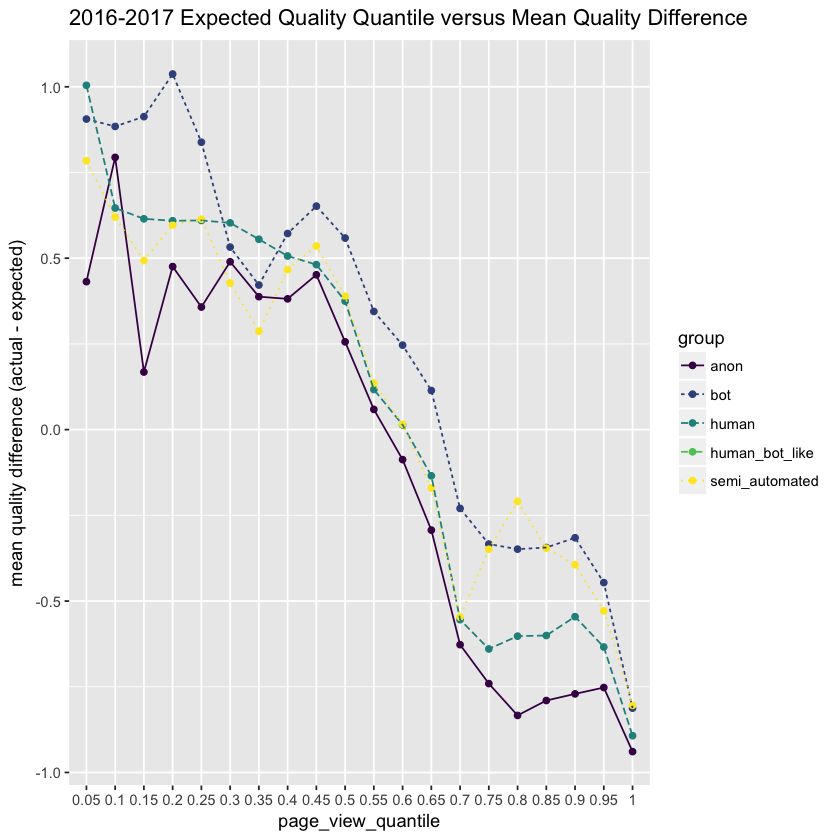

In [110]:
ggplot(page_view_quantiles_and_proportions,
       aes(x=page_view_quantile, y=proportion, color=group, linetype=group, group = group)) + geom_point() + 
ggtitle("2016-2017 Expected Quality Quantile versus Mean Quality Difference") + geom_line() +
scale_color_viridis(discrete=TRUE) + labs(y = "mean quality difference (actual - expected)")

 

In [111]:
by(revisions_weighted_sums_and_page_views_2016_2017, revisions_weighted_sums_and_page_views_2016_2017$group, function(quality_and_page_views){
    
    return(nrow(quality_and_page_views))
})

revisions_weighted_sums_and_page_views_2016_2017$group: 0.05
[1] 35416
------------------------------------------------------------ 
revisions_weighted_sums_and_page_views_2016_2017$group: 0.1
[1] 59337
------------------------------------------------------------ 
revisions_weighted_sums_and_page_views_2016_2017$group: 0.15
[1] 41652
------------------------------------------------------------ 
revisions_weighted_sums_and_page_views_2016_2017$group: 0.2
[1] 56400
------------------------------------------------------------ 
revisions_weighted_sums_and_page_views_2016_2017$group: 0.25
[1] 55303
------------------------------------------------------------ 
revisions_weighted_sums_and_page_views_2016_2017$group: 0.3
[1] 49531
------------------------------------------------------------ 
revisions_weighted_sums_and_page_views_2016_2017$group: 0.35
[1] 50401
------------------------------------------------------------ 
revisions_weighted_sums_and_page_views_2016_2017$group: 0.4
[1] 49624
--